# 🚴 **Cycling Analysis Notebook**  

---


## 🚴 **Table of Contents**  
**1.) [Business Challenge](#1-Business-Challenge)**

**2.) [Objective of this Analysis](#2-Objective-of-this-Analysis)**

**3.) [Data Collection - Web Scraping](#3-Data-Collection-Web-Scraping)** - Scraping and combining all download URL links from the website (https://cycling.data.tfl.gov.uk/) and filtering out relevant usage stats links from 2021 to 2023.

**4.) [Fetching Data and Creating Combined Journey Data](#4-Fetching-Data-and-Creating-Combined-Journey-Data)** - Retrieving journey data from each URL link and merging cycling usage data from 2021 to 2023.  

**5.) [Data-Preprocessing-Cleaning-and-Wrangling](#5-Data-Preprocessing-Cleaning-and-Wrangling)** - Handling missing values, data formatting, and preprocessing.  

**6.) [Exploratory Data Analysis and Visualizations](#6-Exploratory-Data-Analysis-and-Visualizations)**
Exploring trends and insights using visual analysis.  

- **[6.1 Ride Frequency Analysis - Exploratory Data Analysis](#6.1_Ride_Frequency_Analysis_Exploratory_Data_Analysis)**  
  Analyzing hourly, daily, and monthly ride patterns.  

- **[6.2 Heatmap of Station Activity - Exploratory Data Analysis](#6.2_Heatmap_of_Station_Activity_Exploratory_Data_Analysis)**  
  Identifying the busiest pickup and drop-off stations.  

- **[6.3 Popular Routes Analysis - Exploratory Data Analysis](#6.3_Popular_Routes_Analysis_Exploratory_Data_Analysis)**  
  Examining the most frequently traveled routes.  

- **[6.4 Rush Hour vs. Leisure Rides Bar Chart - Exploratory Data Analysis](#6.4_Rush_Hour_vs_Leisure_Rides_Bar_Chart_Exploratory_Data_Analysis)**  
  Comparing ride volumes during rush hours and leisure times.  

- **[6.5 Bike Rebalancing Analysis - Exploratory Data Analysis](#6.5_Bike_Rebalancing_Analysis-Exploratory_Data_Analysis)**  
  Investigating bike rebalancing needs across different stations.  

- **[6.6 Yearly Trends in Bike Usage Line Chart - Exploratory Data Analysis](#6.6_Yearly_Trends_in_Bike_Usage_Line_Chart_Exploratory_Data_Analysis)**  
  Visualizing long-term trends in bike-sharing demand.  

- **[6.7 Bike Model Performance Analysis - Exploratory Data Analysis](#6.7_Bike_Model_Performance_Analysis-Exploratory_Data_Analysis)**  
  Evaluating different bike models based on user preference and durability.  

- **[6.8 Total Trips Per Day - Exploratory Data Analysis](#6.8_Total_Trips_Per_Day-Exploratory_Data_Analysis)**  
  Understanding daily fluctuations in bike usage.  

- **[6.9 Average Trip Duration Per Day - Exploratory Data Analysis](#6.9_Average_Trip_Duration_Per_Day-Exploratory_Data_Analysis)**  
  Analyzing how trip durations vary across different days.  

- **[6.10 Distribution of Trip Duration After Outlier Removal - Exploratory Data Analysis](#6.10_Distribution_of_Trip_Duration_After_Outlier_Removal-Exploratory_Data_Analysis)**  
  Examining the cleaned trip duration data after removing anomalies.  

- **[6.11 Outlier Detection in Bike Demand Data - Exploratory Data Analysis](#6.11_Outlier_Detection_in_Bike_Demand_Data-Exploratory_Data_Analysis)**  
  Identifying and analyzing extreme values affecting bike demand patterns.  

   
**7.) [Bike Demand Forecasting](#7_Bike-Demand-Forecasting)** - Predicting future bike demand using machine learning models.  
   - **[7.1_XGBoost-and-LSTM-models-Bike-Demand-Forecasting](#7.1_XGBoost-and-LSTM-models-Bike-Demand-Forecasting)** - Applying ensemble and deep learning techniques.  
     - **[7.1.1_XGBoost](#7.1.1_XGBoost)** - Using gradient boosting for demand forecasting.  
     - **[7.1.2_LSTM (Long Short-Term Memory Networks)](#7.1.2_LSTM-Long-Short-Term-Memory-Networks)** - Implementing LSTMs for time-series predictions.  
   - **[7.2_Prophet-model-Bike-Demand-Forecasting](#7.2_Prophet-model-Bike-Demand-Forecasting)** - Forecasting demand trends using Facebook’s Prophet model.  
   - **[7.3_SARIMA-model-Bike-Demand-Forecasting](#7.3_SARIMA-model-Bike-Demand-Forecasting)** - Seasonal ARIMA model for capturing demand patterns.  

**8.) [Key Observations](#8_Key-Observations)** - Summarizing insights from the analysis.  Evaluating model performance and accuracy.  

**9.) [Appendix](#9_Appendix)** - Additional references - Checking the LSTM Bike Forecasting Model Residual Plot and Distribution of Residuals.  

---



## **1-Business-Challenge**
One of our clients is considering expanding their business into short term rental-cycles. Before investing, they would like to understand how people in London use cycling services in order to develop their strategy. We have been asked to look at existing biking usage patterns to help them with this. 
From the initial meeting, they suggested that they were interested in what kinds of usage they might expect to see, what profile of customers they might have, as well as operational concerns such as reliability and supply chain management. 

---

## **2-Objective-of-this-Analysis**  
The objective of this analysis is to provide insights into cycling usage patterns in London to help a client determine the feasibility of expanding into the short-term rental cycle business. After the initial client meeting, we’d like to get back to them with an initial response as well as some suggestions for how they can use data to make their expansion a success. Using the TFL cycling dataset (https://cycling.data.tfl.gov.uk/) `usage-stats`12 data from 2021 to 2023: 
1. Perform exploratory analysis on the dataset 
2. Identify possible data science use cases with the data 
3. Select a use case and prototype a simple model that demonstrates the application of data science to this business 
4. Make two recommendations for the client 


# 3-Data-Collection-Web-Scraping

**Scraping and combining all download url links from the website (https://cycling.data.tfl.gov.uk/) and filtering out relevant usage stats links from 2021 to 2023.**

In [16]:
#!pip install selenium

In [17]:
#!pip install webdriver-manager

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

# Set up the Chrome driver
options = webdriver.ChromeOptions()
options.headless = False  # Set to True to run in headless mode
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# URL of the webpage to scrape
url = "https://cycling.data.tfl.gov.uk/"

# Open the webpage
driver.get(url)

# Wait for the page to load
time.sleep(5)  # Adjust this depending on the page load time

# Scroll to the bottom to load more records if lazy loading is used
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(10)  # Wait for new data to load
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break  # Stop if no new content is loaded
    last_height = new_height

# Extract the page's HTML after JavaScript rendering
page_source = driver.page_source

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(page_source, "html.parser")

# Extract relevant elements
file_rows = soup.find_all('tr')

# Initialize lists to store file data
file_names = []
dates_modified = []
sizes = []
types = []
descriptions = []
download_links = []

# Loop through each row and extract file data
for row in file_rows:
    cols = row.find_all('td')
    if len(cols) == 5:
        file_name = cols[0].get_text(strip=True)
        file_names.append(file_name)
        dates_modified.append(cols[1].get_text(strip=True))
        sizes.append(cols[2].get_text(strip=True))
        types.append(cols[3].get_text(strip=True))
        descriptions.append(cols[4].get_text(strip=True))
        
        # Create the download link for each file
        download_link = f"https://cycling.data.tfl.gov.uk/usage-stats/{file_name}"
        download_links.append(download_link)

# Create a DataFrame
df = pd.DataFrame({
    'File Name': file_names,
    'Date Modified': dates_modified,
    'Size': sizes,
    'Type': types,
    'Description': descriptions,
    'Download Link': download_links
})

# Print the DataFrame size
print(f"Total records extracted: {len(df)}")

# Close the browser
driver.quit()


Total records extracted: 752


In [2]:
df

File Name  \
0                         ActiveTravelCountsProgramme/   
1    0 Strategic active travel counts - release not...   
2    0.5 Strategic cycling estimates - methodology ...   
3                           1 Monitoring locations.csv   
4                           2 Availability matrix.xlsx   
..                                                 ...   
747        9b-Journey-Data-Extract-06Sep15-19Sep15.csv   
748                       cyclehireusagestats-2012.zip   
749                       cyclehireusagestats-2013.zip   
750                       cyclehireusagestats-2014.zip   
751                                  cycling-load.json   

                  Date Modified       Size       Type Description  \
0     Jun 5th 2023, 04:05:42 pm                Folder               
1     Jan 4th 2024, 08:27:16 pm    1.01 MB   PDF file               
2    May 17th 2024, 04:14:12 pm    1.07 MB   PDF file               
3     Apr 2nd 2024, 10:42:25 pm     247 KB   CSV file               
4     Dec 6th 2024, 02:33:23 pm    1.38 MB  XLSX file               
..                          ...        ...        ...         ...   
747  Oct 22nd 2015, 09:34:00 pm   50.96 MB   CSV file               
748   Sep 8th 2015, 04:07:13 pm  225.39 MB   ZIP file               
749   Sep 8th 2015, 03:50:50 pm  183.13 MB   ZIP file               
750   Sep 8th 2015, 03:39:38 pm  225.22 MB   ZIP file               
751  May 24th 2017, 08:47:10 pm      11 KB  JSON file               

                                         Download Link  
0    https://cycling.data.tfl.gov.uk/usage-stats/Ac...  
1    https://cycling.data.tfl.gov.uk/usage-stats/0 ...  
2    https://cycling.data.tfl.gov.uk/usage-stats/0....  
3    https://cycling.data.tfl.gov.uk/usage-stats/1 ...  
4    https://cycling.data.tfl.gov.uk/usage-stats/2 ...  
..                                                 ...  
747  https://cycling.data.tfl.gov.uk/usage-stats/9b...  
748  https://cycling.data.tfl.gov.uk/usage-stats/cy...  
749  https://cycling.data.tfl.gov.uk/usage-stats/cy...  
750  https://cycling.data.tfl.gov.uk/usage-stats/cy...  
751  https://cycling.data.tfl.gov.uk/usage-stats/cy...  

[752 rows x 6 columns]

In [3]:
df.count()

File Name        752
Date Modified    752
Size             752
Type             752
Description      752
Download Link    752
dtype: int64

**Removing irrelevant journey data links and filtering journey data from 30th Dec 2020 to 31st Dec 2023.**

In [4]:
# Find the start and end index
start_index = df[df["File Name"] == "246JourneyDataExtract30Dec2020-05Jan2021.csv"].index
end_index = df[df["File Name"] == "386JourneyDataExtract15Dec2023-31Dec2023.csv"].index

if not start_index.empty and not end_index.empty:
    start_index = start_index[0]  # Get the first match index
    end_index = end_index[0]      # Get the first match index
    
    # Filter the dataframe within the range
    df_filtered = df.loc[start_index:end_index]
    
    # Reset index
    df_filtered = df_filtered.reset_index(drop=True)

    # Print results
    print(f"Filtered to {len(df_filtered)} records.")

else:
    print("Start or End File Name not found in the DataFrame.")

# Display first few rows
df_filtered


Filtered to 158 records.


File Name               Date Modified  \
0    246JourneyDataExtract30Dec2020-05Jan2021.csv  Feb 12th 2021, 02:10:44 am   
1    247JourneyDataExtract06Jan2021-12Jan2021.csv  Feb 12th 2021, 02:10:42 am   
2    248JourneyDataExtract13Jan2021-19Jan2021.csv  Feb 12th 2021, 02:10:40 am   
3    249JourneyDataExtract20Jan2021-26Jan2021.csv  Feb 12th 2021, 02:10:38 am   
4     24JourneyDataExtract21Sep2016-27Sep2016.csv   Oct 4th 2016, 02:38:31 pm   
..                                            ...                         ...   
153  382JourneyDataExtract15Oct2023-31Oct2023.csv  Dec 13th 2023, 05:28:34 pm   
154  383JourneyDataExtract01Nov2023-14Nov2023.csv  Dec 13th 2023, 05:28:34 pm   
155  384JourneyDataExtract15Nov2023-30Nov2023.csv  Dec 13th 2023, 05:28:34 pm   
156  385JourneyDataExtract01Dec2023-14Dec2023.csv  May 13th 2024, 07:50:39 pm   
157  386JourneyDataExtract15Dec2023-31Dec2023.csv  May 13th 2024, 07:50:39 pm   

         Size      Type Description  \
0    11.49 MB  CSV file               
1    11.38 MB  CSV file               
2    11.27 MB  CSV file               
3    11.76 MB  CSV file               
4    30.93 MB  CSV file               
..        ...       ...         ...   
153  63.78 MB  CSV file               
154  50.15 MB  CSV file               
155  60.00 MB  CSV file               
156  43.72 MB  CSV file               
157  34.81 MB  CSV file               

                                         Download Link  
0    https://cycling.data.tfl.gov.uk/usage-stats/24...  
1    https://cycling.data.tfl.gov.uk/usage-stats/24...  
2    https://cycling.data.tfl.gov.uk/usage-stats/24...  
3    https://cycling.data.tfl.gov.uk/usage-stats/24...  
4    https://cycling.data.tfl.gov.uk/usage-stats/24...  
..                                                 ...  
153  https://cycling.data.tfl.gov.uk/usage-stats/38...  
154  https://cycling.data.tfl.gov.uk/usage-stats/38...  
155  https://cycling.data.tfl.gov.uk/usage-stats/38...  
156  https://cycling.data.tfl.gov.uk/usage-stats/38...  
157  https://cycling.data.tfl.gov.uk/usage-stats/38...  

[158 rows x 6 columns]

In [5]:
# Create a mask to identify rows that contain '2020', '2021', '2022', or '2023'
mask = df_filtered["File Name"].str.contains("2020|2021|2022|2023", regex=True)

# Get the removed file names (those that don't match the filter)
removed_files = df_filtered[~mask]["File Name"]

# Apply the filter to keep only the matching records
df_filtered = df_filtered[mask].reset_index(drop=True)

# Print results
print(f"Filtered to {len(df_filtered)} records containing 2020-2023 data.\n")

# Print the removed file names
print(f"Total {len(removed_files)} records were removed. File Names removed:\n")
print(removed_files.tolist())

# Display the final filtered dataframe
df_filtered


Filtered to 142 records containing 2020-2023 data.

Total 16 records were removed. File Names removed:

['24JourneyDataExtract21Sep2016-27Sep2016.csv', '25JourneyDataExtract28Sep2016-04Oct2016.csv', '26JourneyDataExtract05Oct2016-11Oct2016.csv', '27JourneyDataExtract12Oct2016-18Oct2016.csv', '28JourneyDataExtract19Oct2016-25Oct2016.csv', '29JourneyDataExtract26Oct2016-01Nov2016.csv', '2a.JourneyDataExtract01Feb15-14Feb15.csv', '2b.JourneyDataExtract15Feb15-28Feb15.csv', '30JourneyDataExtract02Nov2016-08Nov2016.csv', '31JourneyDataExtract09Nov2016-15Nov2016.csv', '32JourneyDataExtract16Nov2016-22Nov2016.csv', '33JourneyDataExtract23Nov2016-29Nov2016.csv', '34JourneyDataExtract30Nov2016-06Dec2016.csv', '35JourneyDataExtract07Dec2016-13Dec2016.csv', '36JourneyDataExtract14Dec2016-20Dec2016.csv', '37JourneyDataExtract21Dec2016-27Dec2016.csv']


File Name               Date Modified  \
0    246JourneyDataExtract30Dec2020-05Jan2021.csv  Feb 12th 2021, 02:10:44 am   
1    247JourneyDataExtract06Jan2021-12Jan2021.csv  Feb 12th 2021, 02:10:42 am   
2    248JourneyDataExtract13Jan2021-19Jan2021.csv  Feb 12th 2021, 02:10:40 am   
3    249JourneyDataExtract20Jan2021-26Jan2021.csv  Feb 12th 2021, 02:10:38 am   
4    250JourneyDataExtract27Jan2021-02Feb2021.csv  Feb 12th 2021, 02:10:36 am   
..                                            ...                         ...   
137  382JourneyDataExtract15Oct2023-31Oct2023.csv  Dec 13th 2023, 05:28:34 pm   
138  383JourneyDataExtract01Nov2023-14Nov2023.csv  Dec 13th 2023, 05:28:34 pm   
139  384JourneyDataExtract15Nov2023-30Nov2023.csv  Dec 13th 2023, 05:28:34 pm   
140  385JourneyDataExtract01Dec2023-14Dec2023.csv  May 13th 2024, 07:50:39 pm   
141  386JourneyDataExtract15Dec2023-31Dec2023.csv  May 13th 2024, 07:50:39 pm   

         Size      Type Description  \
0    11.49 MB  CSV file               
1    11.38 MB  CSV file               
2    11.27 MB  CSV file               
3    11.76 MB  CSV file               
4    11.32 MB  CSV file               
..        ...       ...         ...   
137  63.78 MB  CSV file               
138  50.15 MB  CSV file               
139  60.00 MB  CSV file               
140  43.72 MB  CSV file               
141  34.81 MB  CSV file               

                                         Download Link  
0    https://cycling.data.tfl.gov.uk/usage-stats/24...  
1    https://cycling.data.tfl.gov.uk/usage-stats/24...  
2    https://cycling.data.tfl.gov.uk/usage-stats/24...  
3    https://cycling.data.tfl.gov.uk/usage-stats/24...  
4    https://cycling.data.tfl.gov.uk/usage-stats/25...  
..                                                 ...  
137  https://cycling.data.tfl.gov.uk/usage-stats/38...  
138  https://cycling.data.tfl.gov.uk/usage-stats/38...  
139  https://cycling.data.tfl.gov.uk/usage-stats/38...  
140  https://cycling.data.tfl.gov.uk/usage-stats/38...  
141  https://cycling.data.tfl.gov.uk/usage-stats/38...  

[142 rows x 6 columns]

In [20]:
df_filtered.reset_index(drop=True).to_excel('File1_scraped_data_03232025.xlsx', index=False)

## 4-Fetching-Data-and-Creating-Combined-Journey-Data 

In [85]:
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Show full column width

In [11]:
df_filtered

File Name               Date Modified  \
0    246JourneyDataExtract30Dec2020-05Jan2021.csv  Feb 12th 2021, 02:10:44 am   
1    247JourneyDataExtract06Jan2021-12Jan2021.csv  Feb 12th 2021, 02:10:42 am   
2    248JourneyDataExtract13Jan2021-19Jan2021.csv  Feb 12th 2021, 02:10:40 am   
3    249JourneyDataExtract20Jan2021-26Jan2021.csv  Feb 12th 2021, 02:10:38 am   
4    250JourneyDataExtract27Jan2021-02Feb2021.csv  Feb 12th 2021, 02:10:36 am   
..                                            ...                         ...   
137  382JourneyDataExtract15Oct2023-31Oct2023.csv  Dec 13th 2023, 05:28:34 pm   
138  383JourneyDataExtract01Nov2023-14Nov2023.csv  Dec 13th 2023, 05:28:34 pm   
139  384JourneyDataExtract15Nov2023-30Nov2023.csv  Dec 13th 2023, 05:28:34 pm   
140  385JourneyDataExtract01Dec2023-14Dec2023.csv  May 13th 2024, 07:50:39 pm   
141  386JourneyDataExtract15Dec2023-31Dec2023.csv  May 13th 2024, 07:50:39 pm   

         Size      Type Description  \
0    11.49 MB  CSV file               
1    11.38 MB  CSV file               
2    11.27 MB  CSV file               
3    11.76 MB  CSV file               
4    11.32 MB  CSV file               
..        ...       ...         ...   
137  63.78 MB  CSV file               
138  50.15 MB  CSV file               
139  60.00 MB  CSV file               
140  43.72 MB  CSV file               
141  34.81 MB  CSV file               

                                         Download Link  
0    https://cycling.data.tfl.gov.uk/usage-stats/24...  
1    https://cycling.data.tfl.gov.uk/usage-stats/24...  
2    https://cycling.data.tfl.gov.uk/usage-stats/24...  
3    https://cycling.data.tfl.gov.uk/usage-stats/24...  
4    https://cycling.data.tfl.gov.uk/usage-stats/25...  
..                                                 ...  
137  https://cycling.data.tfl.gov.uk/usage-stats/38...  
138  https://cycling.data.tfl.gov.uk/usage-stats/38...  
139  https://cycling.data.tfl.gov.uk/usage-stats/38...  
140  https://cycling.data.tfl.gov.uk/usage-stats/38...  
141  https://cycling.data.tfl.gov.uk/usage-stats/38...  

[142 rows x 6 columns]

In [15]:
import pandas as pd
import requests
from io import StringIO

# Initialize an empty list to store dataframes
df_list = []

# Set headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

# Loop through each file URL and read the CSV
for index, row in df_filtered.iterrows():
    url = row["Download Link"]
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an error for failed requests

        # Read CSV into pandas dataframe
        temp_df = pd.read_csv(StringIO(response.text))

        # Add 'Source URL' column with the download link
        temp_df["Source URL"] = url  

        df_list.append(temp_df)
        print(f"Downloaded and added: {row['File Name']} ({len(temp_df)} rows)")

    except requests.exceptions.RequestException as e:
        print(f"Failed to download {row['File Name']}: {e}")

# Concatenate all dataframes into one
if df_list:
    combined_journey_data = pd.concat(df_list, ignore_index=True)
    
    # Save to CSV with 'Source URL' column
    combined_journey_data.to_csv("File2_combined_journey_data_03232025.csv", index=False)

    print(f"\nTotal records combined: {len(combined_journey_data)}")
else:
    print("No files could be downloaded.")

Downloaded and added: 246JourneyDataExtract30Dec2020-05Jan2021.csv (93002 rows)
Downloaded and added: 247JourneyDataExtract06Jan2021-12Jan2021.csv (92212 rows)
Downloaded and added: 248JourneyDataExtract13Jan2021-19Jan2021.csv (91203 rows)
Downloaded and added: 249JourneyDataExtract20Jan2021-26Jan2021.csv (95317 rows)
Downloaded and added: 250JourneyDataExtract27Jan2021-02Feb2021.csv (91658 rows)
Downloaded and added: 251JourneyDataExtract03Feb2021-09Feb2021.csv (82029 rows)
Downloaded and added: 252JourneyDataExtract10Feb2021-16Feb2021.csv (89405 rows)
Downloaded and added: 253JourneyDataExtract17Feb2021-23Feb2021.csv (153873 rows)
Downloaded and added: 254JourneyDataExtract24Feb2021-02Mar2021.csv (189092 rows)
Downloaded and added: 255JourneyDataExtract03Mar2021-09Mar2021.csv (150317 rows)
Downloaded and added: 256JourneyDataExtract10Mar2021-16Mar2021.csv (127051 rows)
Downloaded and added: 257JourneyDataExtract17Mar2021-23Mar2021.csv (177515 rows)
Downloaded and added: 258JourneyDat

C:\Users\prakh\AppData\Local\Temp\ipykernel_11624\638330222.py:21: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(StringIO(response.text))


Downloaded and added: 341JourneyDataExtract24Oct2022-30Oct2022.csv (202605 rows)
Downloaded and added: 342JourneyDataExtract31Oct2022-06Nov2022.csv (156440 rows)
Downloaded and added: 343JourneyDataExtract07Nov2022-13Nov2022.csv (197950 rows)
Downloaded and added: 344JourneyDataExtract14Nov2022-20Nov2022.csv (157910 rows)
Downloaded and added: 345JourneyDataExtract21Nov2022-27Nov2022.csv (158545 rows)
Downloaded and added: 346JourneyDataExtract28Nov2022-04Dec2022.csv (163363 rows)
Downloaded and added: 347JourneyDataExtract05Dec2022-11Dec2022.csv (144228 rows)
Downloaded and added: 348JourneyDataExtract12Dec2022-18Dec2022.csv (97901 rows)
Downloaded and added: 349JourneyDataExtract19Dec2022-25Dec2022.csv (95407 rows)
Downloaded and added: 350JourneyDataExtract26Dec2022-01Jan2023.csv (58958 rows)
Downloaded and added: 351JourneyDataExtract02Jan2023-08Jan2023.csv (98609 rows)
Downloaded and added: 352JourneyDataExtract09Jan2023-15Jan2023.csv (134869 rows)
Downloaded and added: 353Journey

C:\Users\prakh\AppData\Local\Temp\ipykernel_11624\638330222.py:21: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(StringIO(response.text))


Downloaded and added: 361JourneyDataExtract13Mar2023-19Mar2023.csv (158548 rows)


C:\Users\prakh\AppData\Local\Temp\ipykernel_11624\638330222.py:21: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(StringIO(response.text))


Downloaded and added: 362JourneyDataExtract20Mar2023-26Mar2023.csv (147469 rows)
Downloaded and added: 363JourneyDataExtract27Mar2023-02Apr2023.csv (138292 rows)
Downloaded and added: 364JourneyDataExtract03Apr2023-09Apr2023.csv (150399 rows)
Downloaded and added: 365JourneyDataExtract10Apr2023-16Apr2023.csv (129528 rows)
Downloaded and added: 366JourneyDataExtract17Apr2023-23Apr2023.csv (163657 rows)
Downloaded and added: 367JourneyDataExtract24Apr2023-30Apr2023.csv (167475 rows)
Downloaded and added: 368JourneyDataExtract01May2023-07May2023.csv (170083 rows)
Downloaded and added: 369JourneyDataExtract08May2023-14May2023.csv (167891 rows)
Downloaded and added: 370JourneyDataExtract15May2023-21May2023.csv (199815 rows)
Downloaded and added: 371JourneyDataExtract22May2023-28May2023.csv (206323 rows)
Downloaded and added: 372JourneyDataExtract29May2023-04Jun2023.csv (183734 rows)
Downloaded and added: 373JourneyDataExtract05Jun2023-11Jun2023.csv (201284 rows)
Downloaded and added: 374Jou

## 5-Data-Preprocessing-Cleaning-and-Wrangling

In [19]:
import pandas as pd
combined_journey_data = pd.read_csv('File2_combined_journey_data_03232025.csv')

In [9]:
combined_journey_data.head()

Rental Id  Duration  Bike Id          End Date  EndStation Id  \
0  104820582.0    1620.0     22.0  03/01/2021 15:14           11.0   
1  104816169.0    1740.0  10755.0  03/01/2021 13:26          542.0   
2  104757113.0    1620.0  18908.0  30/12/2020 15:00          239.0   
3  104749458.0     780.0  18499.0  30/12/2020 09:21          766.0   
4  104788389.0    5400.0  15668.0  01/01/2021 16:29          655.0   

                 EndStation Name        Start Date  StartStation Id  \
0   Brunswick Square, Bloomsbury  03/01/2021 14:47            542.0   
1         Salmon Lane, Limehouse  03/01/2021 12:57            546.0   
2  Warren Street Station, Euston  30/12/2020 14:33            779.0   
3         Ram Street, Wandsworth  30/12/2020 09:08            653.0   
4          Crabtree Lane, Fulham  01/01/2021 14:59            655.0   

                  StartStation Name  Number Start date Start station number  \
0            Salmon Lane, Limehouse     NaN        NaN                  NaN   
1          New Fetter Lane, Holborn     NaN        NaN                  NaN   
2              Houndsditch, Aldgate     NaN        NaN                  NaN   
3  Simpson Street, Clapham Junction     NaN        NaN                  NaN   
4             Crabtree Lane, Fulham     NaN        NaN                  NaN   

  Start station End date End station number End station  Bike number  \
0           NaN      NaN                NaN         NaN          NaN   
1           NaN      NaN                NaN         NaN          NaN   
2           NaN      NaN                NaN         NaN          NaN   
3           NaN      NaN                NaN         NaN          NaN   
4           NaN      NaN                NaN         NaN          NaN   

  Bike model Total duration  Total duration (ms)  
0        NaN            NaN                  NaN  
1        NaN            NaN                  NaN  
2        NaN            NaN                  NaN  
3        NaN            NaN                  NaN  
4        NaN            NaN                  NaN

In [10]:
combined_journey_data.count()

Rental Id               19727277
Duration                19727277
Bike Id                 19727277
End Date                19727277
EndStation Id           19415133
EndStation Name         19727277
Start Date              19727277
StartStation Id         19727277
StartStation Name       19727277
Number                  11059475
Start date              11059475
Start station number    11059475
Start station           11059475
End date                11059475
End station number      11059475
End station             11059475
Bike number             11059475
Bike model              11059475
Total duration          11059475
Total duration (ms)     11059475
dtype: int64

In [18]:
# pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Show full column width

first_2_records = combined_journey_data.head(2)
last_2_records = combined_journey_data.tail(2)

# Combine both first 5 and last 5 records
combined_records = pd.concat([first_2_records, last_2_records])
combined_records

Rental Id  Duration  Bike Id          End Date  EndStation Id  \
0         104820582.0    1620.0     22.0  03/01/2021 15:14           11.0   
1         104816169.0    1740.0  10755.0  03/01/2021 13:26          542.0   
30786750          NaN       NaN      NaN               NaN            NaN   
30786751          NaN       NaN      NaN               NaN            NaN   

                       EndStation Name        Start Date  StartStation Id  \
0         Brunswick Square, Bloomsbury  03/01/2021 14:47            542.0   
1               Salmon Lane, Limehouse  03/01/2021 12:57            546.0   
30786750                           NaN               NaN              NaN   
30786751                           NaN               NaN              NaN   

                 StartStation Name  \
0           Salmon Lane, Limehouse   
1         New Fetter Lane, Holborn   
30786750                       NaN   
30786751                       NaN   

                                                                                        Source URL  \
0         https://cycling.data.tfl.gov.uk/usage-stats/246JourneyDataExtract30Dec2020-05Jan2021.csv   
1         https://cycling.data.tfl.gov.uk/usage-stats/246JourneyDataExtract30Dec2020-05Jan2021.csv   
30786750  https://cycling.data.tfl.gov.uk/usage-stats/386JourneyDataExtract15Dec2023-31Dec2023.csv   
30786751  https://cycling.data.tfl.gov.uk/usage-stats/386JourneyDataExtract15Dec2023-31Dec2023.csv   

               Number        Start date Start station number  \
0                 NaN               NaN                  NaN   
1                 NaN               NaN                  NaN   
30786750  136236515.0  2023-12-15 00:00               300090   
30786751  136236516.0  2023-12-15 00:00                 1052   

                              Start station          End date  \
0                                       NaN               NaN   
1                                       NaN               NaN   
30786750  Blenheim Crescent, Ladbroke Grove  2023-12-15 00:16   
30786751                 Soho Square , Soho  2023-12-15 00:41   

         End station number                    End station  Bike number  \
0                       NaN                            NaN          NaN   
1                       NaN                            NaN          NaN   
30786750             300097  Gwendwr Road, West Kensington      56402.0   
30786751             300050      Walworth Square, Walworth      35802.0   

         Bike model Total duration  Total duration (ms)  
0               NaN            NaN                  NaN  
1               NaN            NaN                  NaN  
30786750    CLASSIC        15m 59s             959545.0  
30786751    CLASSIC        40m 46s            2446785.0

In [33]:
combined_journey_data.groupby('Source URL').count()

Rental Id  \
Source URL                                                                                            
https://cycling.data.tfl.gov.uk/usage-stats/246JourneyDataExtract30Dec2020-05Jan2021.csv      93002   
https://cycling.data.tfl.gov.uk/usage-stats/247JourneyDataExtract06Jan2021-12Jan2021.csv      92212   
https://cycling.data.tfl.gov.uk/usage-stats/248JourneyDataExtract13Jan2021-19Jan2021.csv      91203   
https://cycling.data.tfl.gov.uk/usage-stats/249JourneyDataExtract20Jan2021-26Jan2021.csv      95317   
https://cycling.data.tfl.gov.uk/usage-stats/250JourneyDataExtract27Jan2021-02Feb2021.csv      91658   
https://cycling.data.tfl.gov.uk/usage-stats/251JourneyDataExtract03Feb2021-09Feb2021.csv      82029   
https://cycling.data.tfl.gov.uk/usage-stats/252JourneyDataExtract10Feb2021-16Feb2021.csv      89405   
https://cycling.data.tfl.gov.uk/usage-stats/253JourneyDataExtract17Feb2021-23Feb2021.csv     153873   
https://cycling.data.tfl.gov.uk/usage-stats/254JourneyDataExtract24Feb2021-02Mar2021.csv     189092   
https://cycling.data.tfl.gov.uk/usage-stats/255JourneyDataExtract03Mar2021-09Mar2021.csv     150317   
https://cycling.data.tfl.gov.uk/usage-stats/256JourneyDataExtract10Mar2021-16Mar2021.csv     127051   
https://cycling.data.tfl.gov.uk/usage-stats/257JourneyDataExtract17Mar2021-23Mar2021.csv     177515   
https://cycling.data.tfl.gov.uk/usage-stats/258JourneyDataExtract24Mar2021-30Mar2021.csv     206894   
https://cycling.data.tfl.gov.uk/usage-stats/259JourneyDataExtract31Mar2021-06Apr2021.csv     242574   
https://cycling.data.tfl.gov.uk/usage-stats/260JourneyDataExtract07Apr2021-13Apr2021.csv     191994   
https://cycling.data.tfl.gov.uk/usage-stats/261JourneyDataExtract14Apr2021-20Apr2021.csv     232661   
https://cycling.data.tfl.gov.uk/usage-stats/262JourneyDataExtract21Apr2021-27Apr2021.csv     225985   
https://cycling.data.tfl.gov.uk/usage-stats/263JourneyDataExtract28Apr2021-04May2021.csv     184910   
https://cycling.data.tfl.gov.uk/usage-stats/264JourneyDataExtract05May2021-11May2021.csv     192972   
https://cycling.data.tfl.gov.uk/usage-stats/265JourneyDataExtract12May2021-18May2021.csv     181493   
https://cycling.data.tfl.gov.uk/usage-stats/266JourneyDataExtract19May2021-25May2021.csv     179008   
https://cycling.data.tfl.gov.uk/usage-stats/267JourneyDataExtract26May2021-01Jun2021.csv     296473   
https://cycling.data.tfl.gov.uk/usage-stats/268JourneyDataExtract02Jun2021-08Jun2021.csv     295098   
https://cycling.data.tfl.gov.uk/usage-stats/269JourneyDataExtract09Jun2021-15Jun2021.csv     321708   
https://cycling.data.tfl.gov.uk/usage-stats/270JourneyDataExtract16Jun2021-22Jun2021.csv     211164   
https://cycling.data.tfl.gov.uk/usage-stats/271JourneyDataExtract23Jun2021-29Jun2021.csv     259812   
https://cycling.data.tfl.gov.uk/usage-stats/272JourneyDataExtract30Jun2021-06Jul2021.csv     245842   
https://cycling.data.tfl.gov.uk/usage-stats/273JourneyDataExtract07Jul2021-13Jul2021.csv     259485   
https://cycling.data.tfl.gov.uk/usage-stats/274JourneyDataExtract14Jul2021-20Jul2021.csv     296356   
https://cycling.data.tfl.gov.uk/usage-stats/275JourneyDataExtract21Jul2021-27Jul2021.csv     260283   
https://cycling.data.tfl.gov.uk/usage-stats/276JourneyDataExtract28Jul2021-03Aug2021.csv     235806   
https://cycling.data.tfl.gov.uk/usage-stats/277JourneyDataExtract04Aug2021-10Aug2021.csv     215769   
https://cycling.data.tfl.gov.uk/usage-stats/278JourneyDataExtract11Aug2021-17Aug2021.csv     266897   
https://cycling.data.tfl.gov.uk/usage-stats/279JourneyDataExtract18Aug2021-24Aug2021.csv     253753   
https://cycling.data.tfl.gov.uk/usage-stats/280JourneyDataExtract25Aug2021-31Aug2021.csv     256796   
https://cycling.data.tfl.gov.uk/usage-stats/281JourneyDataExtract01Sep2021-07Sep2021.csv     286958   
https://cycling.data.tfl.gov.uk/usage-stats/282JourneyDataExtract08Sep2021-14Sep2021.csv     269374   
https://cycling.data.tfl.gov.uk/usage-stats/283JourneyDataExtract15Sep202

In [3]:
final_data = combined_journey_data.copy()

In [51]:
final_data.columns

Index(['Rental Id', 'Duration', 'Bike Id', 'End Date', 'EndStation Id',
       'EndStation Name', 'Start Date', 'StartStation Id', 'StartStation Name',
       'Source URL', 'Number', 'Start date', 'Start station number',
       'Start station', 'End date', 'End station number', 'End station',
       'Bike number', 'Bike model', 'Total duration', 'Total duration (ms)'],
      dtype='object')

**There are 3 duration fields in our combined journey dataset.**

- **'Duration' -  is in terms of seconds** 

- **'Total duration' -  is in terms of "minutes, seconds" that is for example 4m 56s** 

- **'Total duration (ms)' - is in terms of milliseconds** "

In [4]:
#Converting values for Total duration (ms) to seconds (s)
final_data['Total_Duration_s'] = final_data['Total duration (ms)'] / 1000

In [5]:
# Replace null values based on the given conditions
final_data['Rental Id'] = final_data['Rental Id'].fillna(final_data['Number'])
final_data['Bike Id'] = final_data['Bike Id'].fillna(final_data['Bike number'])
final_data['EndStation Id'] = final_data['EndStation Id'].fillna(final_data['End station number'])
final_data['End Date'] = final_data['End Date'].fillna(final_data['End date'])
final_data['EndStation Name'] = final_data['EndStation Name'].fillna(final_data['End station'])
final_data['Start Date'] = final_data['Start Date'].fillna(final_data['Start date'])
final_data['StartStation Id'] = final_data['StartStation Id'].fillna(final_data['Start station number'])
final_data['StartStation Name'] = final_data['StartStation Name'].fillna(final_data['Start station'])
final_data['Total_Duration_s'] = final_data['Total_Duration_s'].fillna(final_data['Duration'])

In [6]:
# removing columns which are not required
columns_to_remove = ['Number', 'Bike number', 'End station number', 'End date', 'End station', 
                     'Start date', 'Start station number', 'Start station']

# Remove the specified columns from final_data
final_data = final_data.drop(columns=columns_to_remove)

In [7]:
# Displays the basic info (like data types and null counts)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30786752 entries, 0 to 30786751
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Rental Id            float64
 1   Duration             float64
 2   Bike Id              float64
 3   End Date             object 
 4   EndStation Id        object 
 5   EndStation Name      object 
 6   Start Date           object 
 7   StartStation Id      object 
 8   StartStation Name    object 
 9   Source URL           object 
 10  Bike model           object 
 11  Total duration       object 
 12  Total duration (ms)  float64
 13  Total_Duration_s     float64
dtypes: float64(5), object(9)
memory usage: 3.2+ GB


In [8]:
# Displays the number of nulls in each column
final_data.isnull().sum()

Rental Id                     0
Duration               11059475
Bike Id                       0
End Date                      0
EndStation Id            312144
EndStation Name               0
Start Date                    0
StartStation Id               0
StartStation Name             0
Source URL                    0
Bike model             19727277
Total duration         19727277
Total duration (ms)    19727277
Total_Duration_s              0
dtype: int64

**Checking if "Total_Duration_s" (in terms of seconds) aligns well with the "Total duration" (which is terms of minutes, seconds) column.**

In [9]:
# Now convert Total_Duration_s to minutes and seconds (format: "Xm Ys")
final_data['Total_Duration_min_sec'] = final_data['Total_Duration_s'].apply(
    lambda x: f"{int(x // 60)}m {int(x % 60)}s" if pd.notnull(x) else "NaN"
)

In [10]:
first_5_records = final_data.head(5)
last_5_records = final_data.tail(5)

# Combine both first 5 and last 5 records
combined_records = pd.concat([first_5_records, last_5_records])

# Display the combined records
combined_records[['Total_Duration_s', 'Total_Duration_min_sec','Total duration', 'Total duration (ms)', 'Duration']]

Total_Duration_s Total_Duration_min_sec Total duration  \
0                 1620.000                 27m 0s            NaN   
1                 1740.000                 29m 0s            NaN   
2                 1620.000                 27m 0s            NaN   
3                  780.000                 13m 0s            NaN   
4                 5400.000                 90m 0s            NaN   
30786747           348.272                 5m 48s         5m 48s   
30786748          1479.922                24m 39s        24m 39s   
30786749           147.523                 2m 27s         2m 27s   
30786750           959.545                15m 59s        15m 59s   
30786751          2446.785                40m 46s        40m 46s   

          Total duration (ms)  Duration  
0                         NaN    1620.0  
1                         NaN    1740.0  
2                         NaN    1620.0  
3                         NaN     780.0  
4                         NaN    5400.0  
30786747             348272.0       NaN  
30786748            1479922.0       NaN  
30786749             147523.0       NaN  
30786750             959545.0       NaN  
30786751            2446785.0       NaN

**Since 'Total_Duration_s' and 'Total_Duration_min_sec' aligns well with 'Total duration' and 'Total duration (ms)' fields.**

**We can remove the other duration columns which are not required and contain nulls.**

In [11]:
columns_to_remove = ['Total duration','Total duration (ms)', 'Duration']
final_data = final_data.drop(columns=columns_to_remove)

In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30786752 entries, 0 to 30786751
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Rental Id               float64
 1   Bike Id                 float64
 2   End Date                object 
 3   EndStation Id           object 
 4   EndStation Name         object 
 5   Start Date              object 
 6   StartStation Id         object 
 7   StartStation Name       object 
 8   Source URL              object 
 9   Bike model              object 
 10  Total_Duration_s        float64
 11  Total_Duration_min_sec  object 
dtypes: float64(3), object(9)
memory usage: 2.8+ GB


#### Data Cleaning and Converting Start Date and End Dates to timestamp

In [13]:
first_2_records = final_data.head(2)
last_2_records = final_data.tail(2)

# Combine both first 5 and last 5 records
combined_records = pd.concat([first_2_records, last_2_records])
combined_records

Rental Id  Bike Id          End Date EndStation Id  \
0         104820582.0     22.0  03/01/2021 15:14          11.0   
1         104816169.0  10755.0  03/01/2021 13:26         542.0   
30786750  136236515.0  56402.0  2023-12-15 00:16        300097   
30786751  136236516.0  35802.0  2023-12-15 00:41        300050   

                        EndStation Name        Start Date StartStation Id  \
0          Brunswick Square, Bloomsbury  03/01/2021 14:47           542.0   
1                Salmon Lane, Limehouse  03/01/2021 12:57           546.0   
30786750  Gwendwr Road, West Kensington  2023-12-15 00:00          300090   
30786751      Walworth Square, Walworth  2023-12-15 00:00            1052   

                          StartStation Name  \
0                    Salmon Lane, Limehouse   
1                  New Fetter Lane, Holborn   
30786750  Blenheim Crescent, Ladbroke Grove   
30786751                 Soho Square , Soho   

                                                                                        Source URL  \
0         https://cycling.data.tfl.gov.uk/usage-stats/246JourneyDataExtract30Dec2020-05Jan2021.csv   
1         https://cycling.data.tfl.gov.uk/usage-stats/246JourneyDataExtract30Dec2020-05Jan2021.csv   
30786750  https://cycling.data.tfl.gov.uk/usage-stats/386JourneyDataExtract15Dec2023-31Dec2023.csv   
30786751  https://cycling.data.tfl.gov.uk/usage-stats/386JourneyDataExtract15Dec2023-31Dec2023.csv   

         Bike model  Total_Duration_s Total_Duration_min_sec  
0               NaN          1620.000                 27m 0s  
1               NaN          1740.000                 29m 0s  
30786750    CLASSIC           959.545                15m 59s  
30786751    CLASSIC          2446.785                40m 46s

In [14]:
# Function to safely convert to datetime with multiple formats
def safe_datetime_conversion(date_series):
    return pd.to_datetime(date_series, errors="coerce", format="%d/%m/%Y %H:%M").fillna(
        pd.to_datetime(date_series, errors="coerce", format="%Y-%m-%d %H:%M")
    )

# Apply the function
final_data["Start Date"] = safe_datetime_conversion(final_data["Start Date"])
final_data["End Date"] = safe_datetime_conversion(final_data["End Date"])

# Identify missing timestamps
missing_dates = final_data[final_data["Start Date"].isna() | final_data["End Date"].isna()]
if not missing_dates.empty:
    print("Warning: Missing or incorrectly formatted dates detected!")
    print(missing_dates)

#### Data Cleaning - StartStation Id and EndStation Id columns

In [16]:
# Convert column to string first, then check for non-numeric values
non_numeric_values = final_data[~final_data["StartStation Id"].astype(str).str.isnumeric()]

# Print unique non-numeric values
print(non_numeric_values["StartStation Id"].unique())

[542.0 546.0 779.0 653.0 655.0 662.0 440.0 457.0 458.0 476.0 490.0 543.0
 558.0 590.0 607.0 625.0 626.0 589.0 596.0 621.0 564.0 587.0 1.0 10.0 12.0
 37.0 42.0 71.0 289.0 307.0 308.0 322.0 340.0 375.0 376.0 425.0 439.0 95.0
 102.0 109.0 120.0 127.0 159.0 177.0 184.0 188.0 195.0 213.0 220.0 234.0
 252.0 153.0 162.0 185.0 187.0 194.0 196.0 219.0 221.0 228.0 2.0 841.0
 842.0 706.0 720.0 727.0 756.0 243.0 268.0 293.0 638.0 670.0 677.0 688.0
 318.0 336.0 343.0 361.0 379.0 386.0 404.0 696.0 728.0 755.0 762.0 387.0
 394.0 419.0 421.0 428.0 453.0 455.0 462.0 485.0 496.0 521.0 553.0 562.0
 239.0 272.0 275.0 166.0 181.0 183.0 200.0 215.0 217.0 230.0 298.0 300.0
 191.0 192.0 224.0 242.0 255.0 158.0 172.0 189.0 190.0 225.0 124.0 155.0
 156.0 173.0 174.0 9.0 20.0 27.0 45.0 52.0 77.0 84.0 214.0 216.0 233.0
 643.0 658.0 675.0 676.0 690.0 707.0 725.0 826.0 840.0 764.0 787.0 789.0
 794.0 796.0 798.0 821.0 828.0 163.0 167.0 180.0 199.0 581.0 583.0 600.0
 615.0 651.0 668.0 683.0 700.0 715.0 717.0 732.0 77

In [17]:
# Convert column to string first, then check for non-numeric values
non_numeric_values = final_data[~final_data["EndStation Id"].astype(str).str.isnumeric()]

# Print unique non-numeric values
print(non_numeric_values["EndStation Id"].unique())

[11.0 542.0 239.0 766.0 655.0 682.0 395.0 185.0 272.0 270.0 229.0 99.0
 532.0 586.0 409.0 732.0 194.0 10.0 616.0 651.0 750.0 688.0 91.0 300.0
 782.0 2.0 216.0 668.0 209.0 620.0 728.0 658.0 691.0 302.0 838.0 444.0
 127.0 136.0 603.0 459.0 275.0 495.0 521.0 558.0 321.0 14.0 389.0 366.0
 259.0 329.0 440.0 42.0 282.0 37.0 260.0 151.0 379.0 584.0 541.0 225.0
 524.0 622.0 641.0 502.0 336.0 169.0 184.0 341.0 252.0 95.0 498.0 809.0
 314.0 562.0 546.0 433.0 148.0 353.0 143.0 804.0 403.0 193.0 310.0 283.0
 581.0 67.0 511.0 119.0 153.0 280.0 235.0 38.0 24.0 197.0 331.0 196.0
 213.0 404.0 8.0 250.0 605.0 168.0 481.0 291.0 102.0 830.0 303.0 720.0
 662.0 345.0 180.0 727.0 348.0 756.0 228.0 595.0 683.0 640.0 673.0 397.0
 690.0 796.0 318.0 722.0 396.0 726.0 685.0 625.0 515.0 167.0 596.0 316.0
 218.0 220.0 611.0 412.0 144.0 110.0 97.0 85.0 842.0 834.0 146.0 420.0
 210.0 488.0 449.0 25.0 516.0 786.0 1.0 553.0 52.0 592.0 69.0 278.0 831.0
 217.0 670.0 715.0 706.0 27.0 749.0 698.0 844.0 405.0 113.0 307.0 3

In [19]:
final_data.isnull().sum()

Rental Id                        0
Bike Id                          0
End Date                         0
EndStation Id               312144
EndStation Name                  0
Start Date                       0
StartStation Id                  0
StartStation Name                0
Source URL                       0
Bike model                19727277
Total_Duration_s                 0
Total_Duration_min_sec           0
dtype: int64

In [20]:
import re

# Function to clean station IDs (extract only numbers)
def clean_station_id(station_id):
    if isinstance(station_id, str):  # Only process strings
        cleaned_id = re.findall(r'\d+', station_id)  # Extract numbers
        return int(cleaned_id[0]) if cleaned_id else None  # Convert to int
    return station_id  # Keep valid numeric values unchanged

# Apply cleaning function
final_data["StartStation Id"] = final_data["StartStation Id"].astype(str).apply(clean_station_id)
final_data["EndStation Id"] = final_data["EndStation Id"].astype(str).apply(clean_station_id)

# Convert to integer type
final_data["StartStation Id"] = pd.to_numeric(final_data["StartStation Id"], errors="coerce").astype("Int64")
final_data["EndStation Id"] = pd.to_numeric(final_data["EndStation Id"], errors="coerce").astype("Int64")

# Check if all IDs are now numeric
print(final_data[["StartStation Id", "EndStation Id"]].dtypes)

StartStation Id    Int64
EndStation Id      Int64
dtype: object


- #### Convert numeric columns to appropriate types; 
- #### Filling Missing "Bike model" values to UNKNOWN; 
- #### Create additional time features from Start Date and End Date.

In [21]:
# Convert numeric columns to appropriate types
final_data["Rental Id"] = final_data["Rental Id"].astype("Int64")
final_data["Bike Id"] = final_data["Bike Id"].astype("Int64")
final_data["Total_Duration_s"] = final_data["Total_Duration_s"].astype(int)

# Fill missing Bike model values
final_data["Bike model"] = final_data["Bike model"].fillna("UNKNOWN")

# Extract additional time features
final_data["Start Time"] = final_data["Start Date"].dt.time
final_data["End Time"] = final_data["End Date"].dt.time
final_data["Day of Week"] = final_data["Start Date"].dt.day_name()
final_data["Month"] = final_data["Start Date"].dt.month
final_data["Year"] = final_data["Start Date"].dt.year

In [22]:
# Displaying First 2 and Last 2 records
first_2_records = final_data.head(2)
last_2_records = final_data.tail(2)
combined_records = pd.concat([first_2_records, last_2_records])
combined_records

Rental Id  Bike Id            End Date  EndStation Id  \
0         104820582       22 2021-01-03 15:14:00             11   
1         104816169    10755 2021-01-03 13:26:00            542   
30786750  136236515    56402 2023-12-15 00:16:00         300097   
30786751  136236516    35802 2023-12-15 00:41:00         300050   

                        EndStation Name          Start Date  StartStation Id  \
0          Brunswick Square, Bloomsbury 2021-01-03 14:47:00              542   
1                Salmon Lane, Limehouse 2021-01-03 12:57:00              546   
30786750  Gwendwr Road, West Kensington 2023-12-15 00:00:00           300090   
30786751      Walworth Square, Walworth 2023-12-15 00:00:00             1052   

                          StartStation Name  \
0                    Salmon Lane, Limehouse   
1                  New Fetter Lane, Holborn   
30786750  Blenheim Crescent, Ladbroke Grove   
30786751                 Soho Square , Soho   

                                                                                        Source URL  \
0         https://cycling.data.tfl.gov.uk/usage-stats/246JourneyDataExtract30Dec2020-05Jan2021.csv   
1         https://cycling.data.tfl.gov.uk/usage-stats/246JourneyDataExtract30Dec2020-05Jan2021.csv   
30786750  https://cycling.data.tfl.gov.uk/usage-stats/386JourneyDataExtract15Dec2023-31Dec2023.csv   
30786751  https://cycling.data.tfl.gov.uk/usage-stats/386JourneyDataExtract15Dec2023-31Dec2023.csv   

         Bike model  Total_Duration_s Total_Duration_min_sec Start Time  \
0           UNKNOWN              1620                 27m 0s   14:47:00   
1           UNKNOWN              1740                 29m 0s   12:57:00   
30786750    CLASSIC               959                15m 59s   00:00:00   
30786751    CLASSIC              2446                40m 46s   00:00:00   

          End Time Day of Week  Month  Year  
0         15:14:00      Sunday      1  2021  
1         13:26:00      Sunday      1  2021  
30786750  00:16:00      Friday     12  2023  
30786751  00:41:00      Friday     12  2023

### Investigating the "EndStation Id" null records

In [24]:
final_data.isnull().sum()

Rental Id                      0
Bike Id                        0
End Date                       0
EndStation Id             312144
EndStation Name                0
Start Date                     0
StartStation Id                0
StartStation Name              0
Source URL                     0
Bike model                     0
Total_Duration_s               0
Total_Duration_min_sec         0
Start Time                     0
End Time                       0
Day of Week                    0
Month                          0
Year                           0
dtype: int64

In [23]:
null_endstation_rows = final_data[final_data["EndStation Id"].isna()]
null_endstation_rows

Rental Id  Bike Id            End Date  EndStation Id  \
17074695  122342973    16835 2022-07-06 15:26:00           <NA>   
17074696  122443043     8260 2022-07-08 18:09:00           <NA>   
17074697  122392666    17431 2022-07-07 17:00:00           <NA>   
17074698  122516692       39 2022-07-10 11:47:00           <NA>   
17074699  122561553     6484 2022-07-11 09:55:00           <NA>   
...             ...      ...                 ...            ...   
17386834  122470725     6820 2022-07-09 12:31:00           <NA>   
17386835  122485029     4858 2022-07-09 21:21:00           <NA>   
17386836  122548002    21456 2022-07-10 21:36:00           <NA>   
17386837  122584958    20054 2022-07-11 20:58:00           <NA>   
17386838  122498326    13179 2022-07-09 21:28:00           <NA>   

                                 EndStation Name          Start Date  \
17074695  St. Mary & St. Michael Church, Stepney 2022-07-06 15:23:00   
17074696          Belgrove Street , King's Cross 2022-07-08 17:46:00   
17074697          Eel Brook Common, Walham Green 2022-07-07 16:50:00   
17074698               Drury Lane, Covent Garden 2022-07-10 11:32:00   
17074699         Duke Street Hill, London Bridge 2022-07-11 09:36:00   
...                                          ...                 ...   
17386834       Kennington Road Post Office, Oval 2022-07-09 12:02:00   
17386835     Rotherhithe Roundabout, Rotherhithe 2022-07-09 16:00:00   
17386836                  Temple Gardens, Temple 2022-07-10 21:11:00   
17386837       Canada Water Station, Rotherhithe 2022-07-11 18:49:00   
17386838                   Antill Road, Mile End 2022-07-09 19:48:00   

          StartStation Id                    StartStation Name  \
17074695              500                Ansell House, Stepney   
17074696              297  Geraldine Street, Elephant & Castle   
17074697              615                Finlay Street, Fulham   
17074698              310          Black Prince Road, Vauxhall   
17074699              310          Black Prince Road, Vauxhall   
...                   ...                                  ...   
17386834              844    Canada Water Station, Rotherhithe   
17386835              844    Canada Water Station, Rotherhithe   
17386836              844    Canada Water Station, Rotherhithe   
17386837              844    Canada Water Station, Rotherhithe   
17386838              844    Canada Water Station, Rotherhithe   

                                                                                        Source URL  \
17074695  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   
17074696  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   
17074697  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   
17074698  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   
17074699  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   
...                                                                                            ...   
17386834  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   
17386835  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   
17386836  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   
17386837  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   
17386838  https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv   

         Bike model  Total_Duration_s Total_Duration_min_sec Start Time  \
17074695    UNKNOWN               180                  3m 0s   15:23:00   
17074696    UNKNOWN              1380                 23m 0s   17:46:00   
17074697    UNKNOWN               600                 10m 0s   16:50:00   
17074698    UNKNOWN   

In [25]:
print(null_endstation_rows["Source URL"].value_counts())
print(null_endstation_rows["StartStation Id"].value_counts())

Source URL
https://cycling.data.tfl.gov.uk/usage-stats/325JourneyDataExtract06Jul2022-12Jul2022.csv    312144
Name: count, dtype: int64
StartStation Id
191    2433
213    1800
307    1738
248    1527
374    1469
       ... 
767      56
472      46
608      43
490      39
816      31
Name: count, Length: 791, dtype: Int64


#### All 312144 null_endstation_rows are from the usage stats - Journey Data Extract 06July2022 to 12 July 2022.

In [26]:
# Filling the null_endstation_rows with -1 to make the data type as INT for all records. 
final_data["EndStation Id"] = final_data["EndStation Id"].fillna(-1)  # For numeric type

In [27]:
final_data.isnull().sum()

Rental Id                 0
Bike Id                   0
End Date                  0
EndStation Id             0
EndStation Name           0
Start Date                0
StartStation Id           0
StartStation Name         0
Source URL                0
Bike model                0
Total_Duration_s          0
Total_Duration_min_sec    0
Start Time                0
End Time                  0
Day of Week               0
Month                     0
Year                      0
dtype: int64

In [28]:
#checking the distribution and potential inconsistencies in columns

for i in final_data.columns:
    print(i)
    print(final_data[i].value_counts())

Rental Id
Rental Id
104820582    1
125966376    1
125966320    1
125966319    1
125966318    1
            ..
115320047    1
115379408    1
115322375    1
115368304    1
136236516    1
Name: count, Length: 30786752, dtype: Int64
Bike Id
Bike Id
19226    3439
18330    3439
20073    3424
19003    3420
20195    3378
         ... 
1714        1
642         1
40066       1
15899       1
563         1
Name: count, Length: 28804, dtype: Int64
End Date
End Date
2021-02-27 16:48:00    155
2022-08-19 18:00:00    154
2022-06-21 18:25:00    152
2021-02-27 16:52:00    147
2022-06-21 18:51:00    146
                      ... 
2022-04-06 02:39:00      1
2022-04-10 04:18:00      1
2022-04-11 05:39:00      1
2022-04-10 04:04:00      1
2021-04-08 00:20:00      1
Name: count, Length: 1471283, dtype: int64
EndStation Id
EndStation Id
-1        312144
191       160653
194       116759
213       101394
303        99303
           ...  
850          280
10626        125
123456         5
778            1
3002

In [31]:
#Checking if duplicate rows exist in the data
final_data.duplicated().sum()

0

In [30]:
final_data.to_csv('File3_final_cleaned_data_03232025.csv', index=False)

#  6-Exploratory-Data-Analysis-and-Visualizations

In [1]:
import pandas as pd
final_data = pd.read_csv('File3_final_cleaned_data_03232025.csv')

In [3]:
df = final_data.copy()

In [5]:
df.head()

Rental Id  Bike Id             End Date  EndStation Id  \
0  104820582       22  2021-01-03 15:14:00             11   
1  104816169    10755  2021-01-03 13:26:00            542   
2  104757113    18908  2020-12-30 15:00:00            239   
3  104749458    18499  2020-12-30 09:21:00            766   
4  104788389    15668  2021-01-01 16:29:00            655   

                 EndStation Name           Start Date  StartStation Id  \
0   Brunswick Square, Bloomsbury  2021-01-03 14:47:00              542   
1         Salmon Lane, Limehouse  2021-01-03 12:57:00              546   
2  Warren Street Station, Euston  2020-12-30 14:33:00              779   
3         Ram Street, Wandsworth  2020-12-30 09:08:00              653   
4          Crabtree Lane, Fulham  2021-01-01 14:59:00              655   

                  StartStation Name  \
0            Salmon Lane, Limehouse   
1          New Fetter Lane, Holborn   
2              Houndsditch, Aldgate   
3  Simpson Street, Clapham Junction   
4             Crabtree Lane, Fulham   

                                          Source URL Bike model  \
0  https://cycling.data.tfl.gov.uk/usage-stats/24...    UNKNOWN   
1  https://cycling.data.tfl.gov.uk/usage-stats/24...    UNKNOWN   
2  https://cycling.data.tfl.gov.uk/usage-stats/24...    UNKNOWN   
3  https://cycling.data.tfl.gov.uk/usage-stats/24...    UNKNOWN   
4  https://cycling.data.tfl.gov.uk/usage-stats/24...    UNKNOWN   

   Total_Duration_s Total_Duration_min_sec          Start Time  \
0              1620                 27m 0s 2025-03-26 14:47:00   
1              1740                 29m 0s 2025-03-26 12:57:00   
2              1620                 27m 0s 2025-03-26 14:33:00   
3               780                 13m 0s 2025-03-26 09:08:00   
4              5400                 90m 0s 2025-03-26 14:59:00   

             End Time Day of Week  Month  Year  hour  
0 2025-03-26 15:14:00      Sunday      1  2021    14  
1 2025-03-26 13:26:00      Sunday      1  2021    12  
2 2025-03-26 15:00:00   Wednesday     12  2020    14  
3 2025-03-26 09:21:00   Wednesday     12  2020     9  
4 2025-03-26 16:29:00      Friday      1  2021    14

## 6.1_Ride_Frequency_Analysis_Exploratory_Data_Analysis

#### **Hourly Trends**
- **Use Case:** Identify peak hours for demand.
- **Observation:** Ride usage is lowest during late night hours and peaks around **8 AM (morning rush) and 5-7 PM (evening commute).**

#### **Daily Trends**
- **Use Case:** Understand how usage changes by day of the week.
- **Observation:** Weekdays have relatively consistent usage, with **slight dips on Monday & Sunday.** Weekend usage remains high, likely due to leisure activities.

#### **Monthly Trends**
- **Use Case:** Identify seasonal variations in ride demand.
- **Observation:** Peak usage occurs during **summer months (June - August)**, while winter months (December - February) show a decline, indicating a seasonal effect.


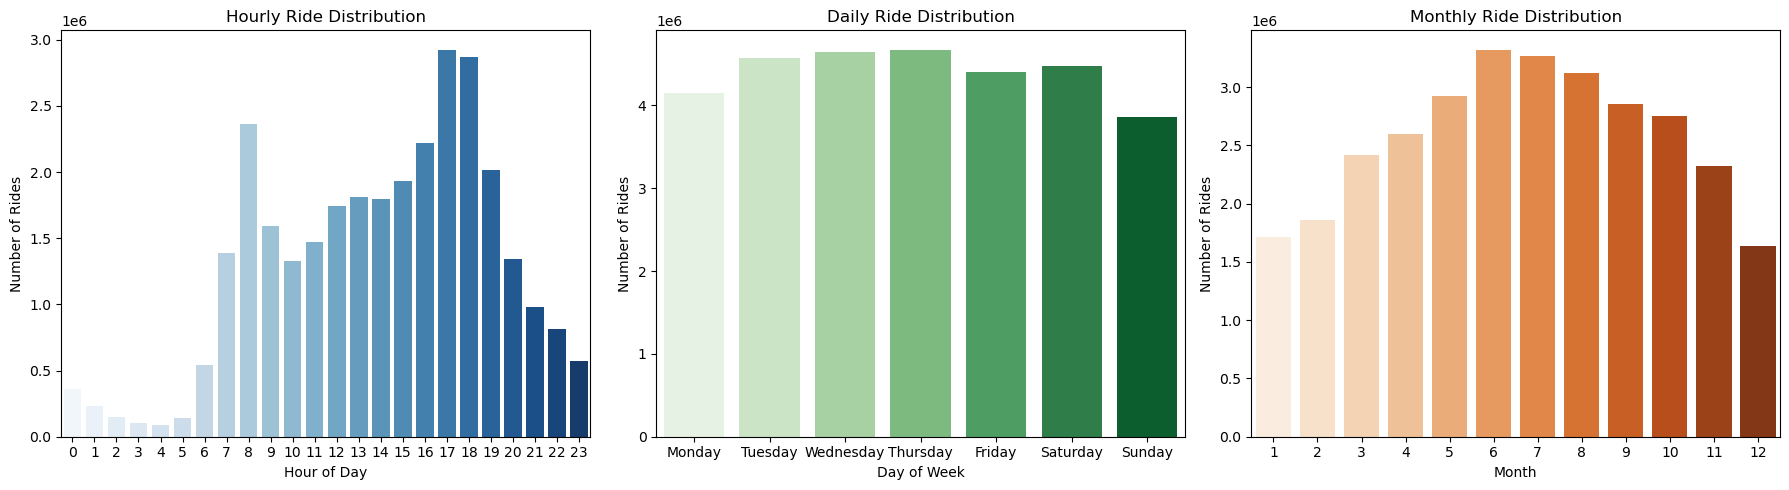

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert timestamp to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

# Extract time-related features
df['hour'] = df['Start Time'].dt.hour

## Ride Frequency Analysis
# Ride Frequency Trends: Hourly, Daily, Monthly Patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hourly distribution
sns.countplot(x="hour", data=df, ax=axes[0], palette="Blues")
axes[0].set_title("Hourly Ride Distribution")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Number of Rides")

# Daily distribution
sns.countplot(x="Day of Week", data=df, ax=axes[1], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="Greens")
axes[1].set_title("Daily Ride Distribution")
axes[1].set_xlabel("Day of Week")
axes[1].set_ylabel("Number of Rides")

# Monthly distribution
sns.countplot(x="Month", data=df, ax=axes[2], palette="Oranges")
axes[2].set_title("Monthly Ride Distribution")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Number of Rides")

plt.tight_layout()
plt.show()

## 6.2_Heatmap_of_Station_Activity_Exploratory_Data_Analysis

#### **Top 20 Start Stations**
   - **Use Case:** Identify popular departure locations for better station stocking.
   - **Observation:** **Hyde Park Corner, Hyde Park** is the most popular starting location, likely due to high tourist activity.

#### **Top 20 End Stations**
   - **Use Case:** Optimize bike redistribution by analyzing where most trips end.
   - **Observation:** **Hyde Park Corner, Hyde Park** is also the most common endpoint, indicating frequent short loops or round trips.

C:\Users\prakh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


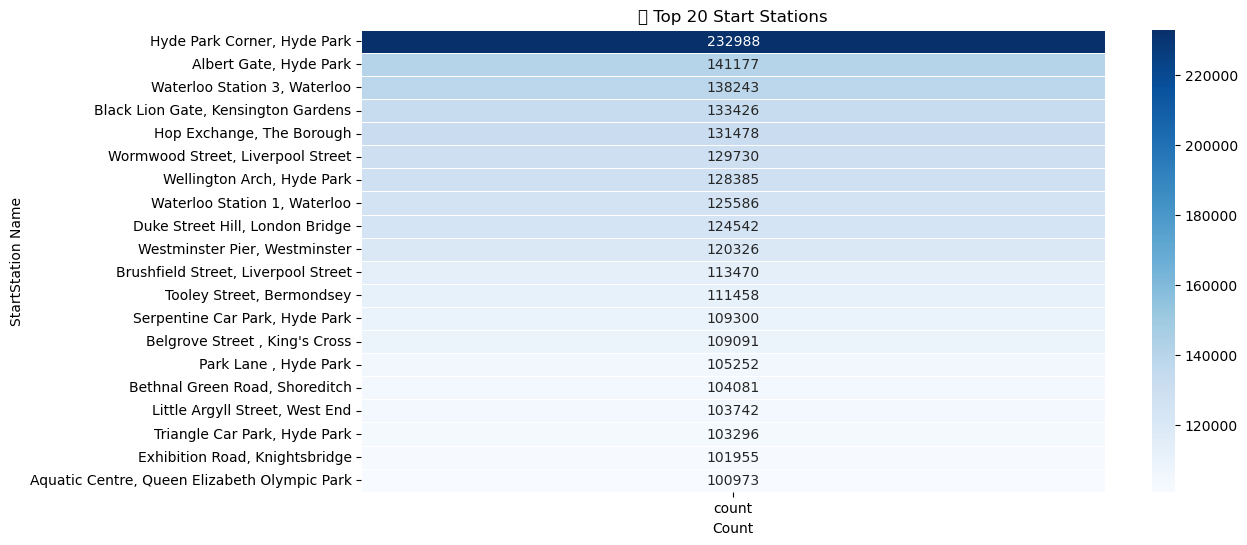

C:\Users\prakh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


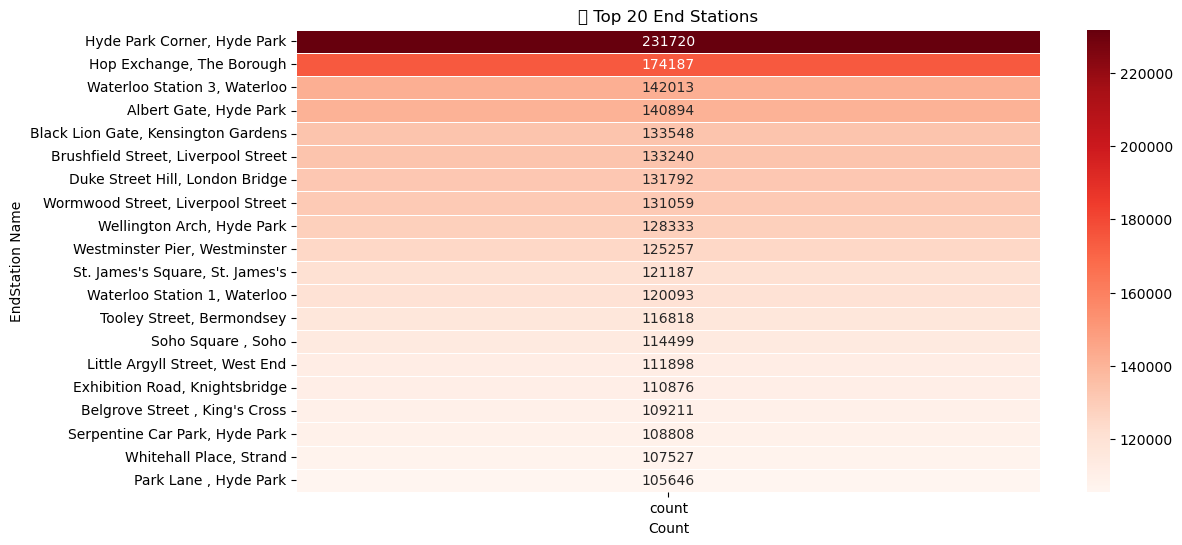

In [7]:
## Heatmap of Station Activity
# Aggregate ride counts for start and end stations
start_station_counts = df["StartStation Name"].value_counts().head(20)
end_station_counts = df["EndStation Name"].value_counts().head(20)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(start_station_counts), annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("🚲 Top 20 Start Stations")
plt.xlabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(end_station_counts), annot=True, cmap="Reds", fmt="d", linewidths=0.5)
plt.title("🏁 Top 20 End Stations")
plt.xlabel("Count")
plt.show()

## 6.3_Popular_Routes_Analysis_Exploratory_Data_Analysis

#### **Top 10 Most Popular Routes**
   - **Use Case:** Identify frequently traveled routes to improve bike redistribution and infrastructure planning.
   - **Observation:** The most popular routes are **short, looped trips within parks**, such as **Hyde Park Corner, Hyde Park → Hyde Park Corner, Hyde Park** and **Aquatic Centre, Queen Elizabeth Olympic Park → Aquatic Centre, Queen Elizabeth Olympic Park**. This suggests a mix of recreational riders and tourists using the service.


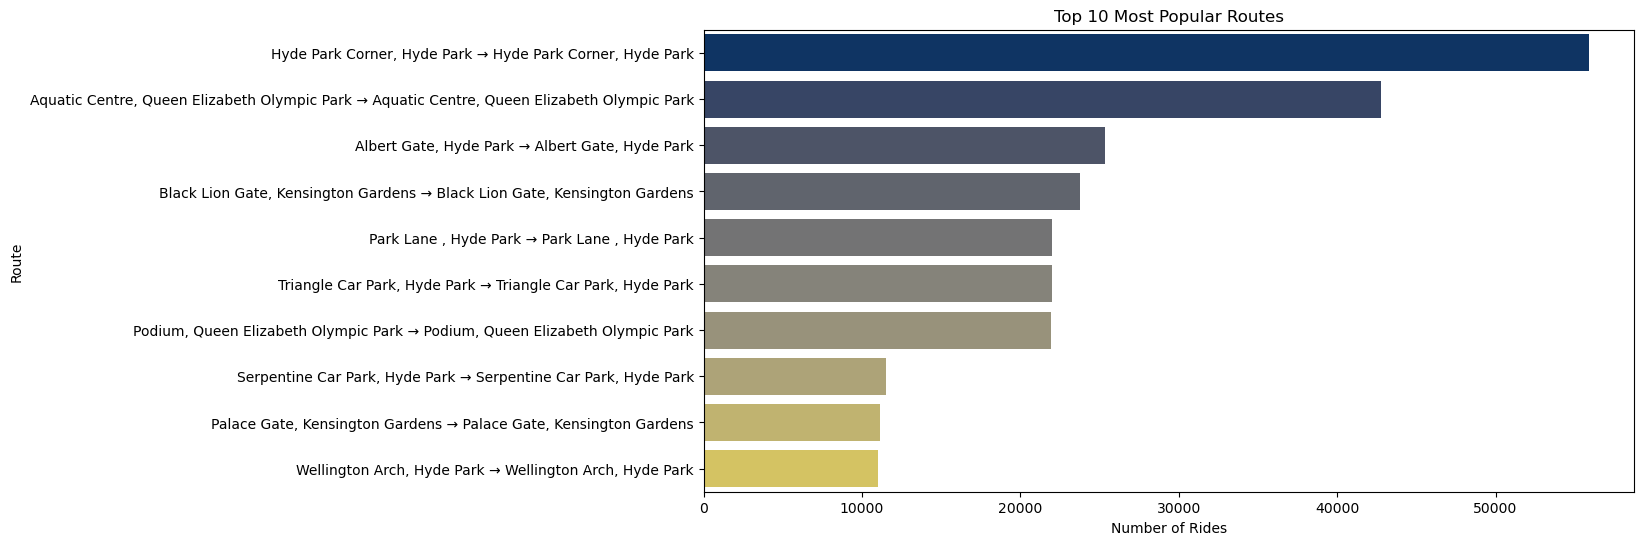

In [8]:
## Popular Routes Analysis
popular_routes = df.groupby(['StartStation Name', 'EndStation Name']).size().reset_index(name='count')
popular_routes = popular_routes.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=popular_routes['count'], y=popular_routes.apply(lambda x: f"{x['StartStation Name']} → {x['EndStation Name']}", axis=1), palette='cividis')
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Rides')
plt.ylabel('Route')
plt.show()

## 6.4_Rush_Hour_vs_Leisure_Rides_Bar_Chart_Exploratory_Data_Analysis

 **Use Case**  
Helps city planners and bike-sharing companies optimize bike availability during peak and off-peak hours.  

 **Defining Rush Hour**  
For defining Rush Hour, we need to consider common commuting patterns. In most cities, rush hour typically falls within:  

🔹 **Morning Rush Hour**: 07:00 - 10:00 AM (people commuting to work)  
🔹 **Evening Rush Hour**: 16:00 - 19:00 PM (people returning from work)  

So, a ride is classified as **Rush Hour** if:  

- The **Start Time** falls within **07:00 - 10:00 AM** or **16:00 - 19:00 PM**.  
- All other trips are classified as **Leisure Rides**.  

 **Observation**  
More rides occur **outside rush hours**, indicating that **leisure rides dominate over commuter rides**.  


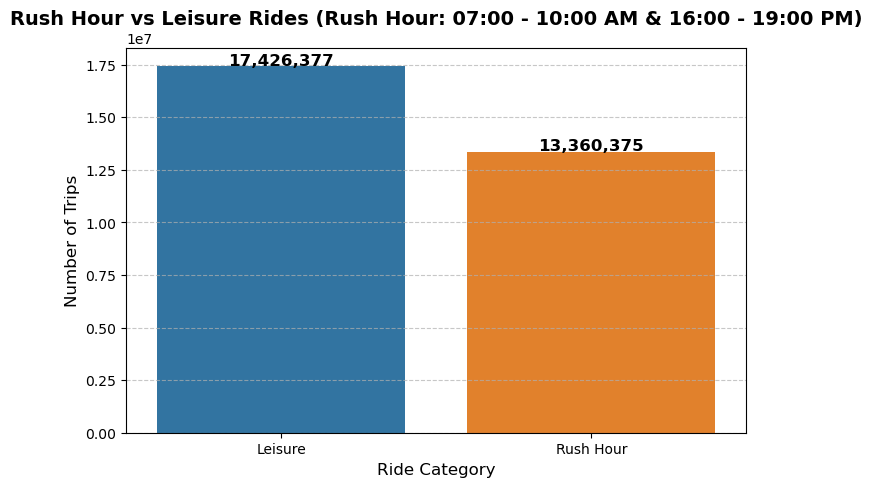

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Start Time' to datetime if not already done
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%H:%M:%S')

# Define rush hour intervals
morning_rush = (df['Start Time'].dt.hour >= 7) & (df['Start Time'].dt.hour < 10)
evening_rush = (df['Start Time'].dt.hour >= 16) & (df['Start Time'].dt.hour < 19)

# Create a new column to classify rides
df['Ride Category'] = 'Leisure'
df.loc[morning_rush | evening_rush, 'Ride Category'] = 'Rush Hour'

# Count the trips in each category
rush_hour_counts = df['Ride Category'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=rush_hour_counts.index, y=rush_hour_counts.values, palette=['#1f77b4', '#ff7f0e'])

# Add text labels
for i, val in enumerate(rush_hour_counts.values):
    plt.text(i, val + 50000, f"{val:,}", ha='center', fontsize=12, fontweight='bold')

# Customize
plt.title("Rush Hour vs Leisure Rides (Rush Hour: 07:00 - 10:00 AM & 16:00 - 19:00 PM)", fontsize=14, fontweight='bold')
plt.xlabel("Ride Category", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


## 6.5_Bike_Rebalancing_Analysis-Exploratory_Data_Analysis

Use Case: Analyzes station imbalances to optimize bike distribution strategies.
This histogram identifies station imbalances, showing where more bikes arrive than leave. It helps optimize station locations and distribution.

Observation: Most stations have small net bike flow, but some experience high positive/negative fluctuations, requiring manual rebalancing.

C:\Users\prakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



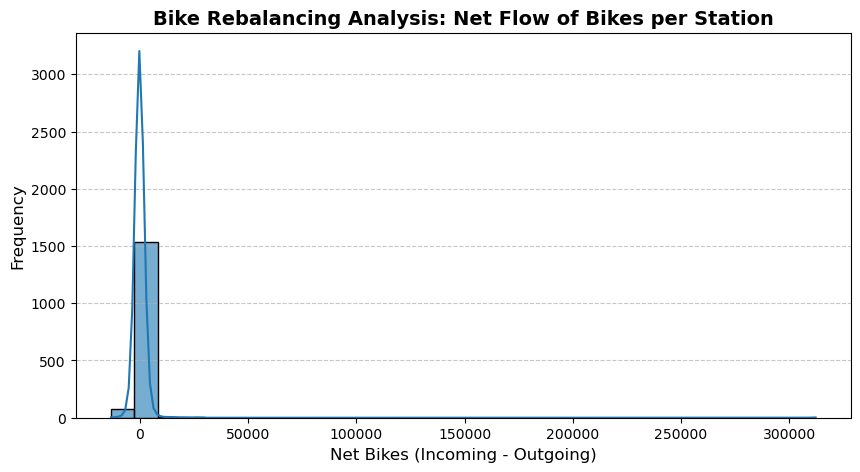

In [28]:
# Count outgoing and incoming rides per station
start_counts = df["StartStation Id"].value_counts()
end_counts = df["EndStation Id"].value_counts()

# Merge into a single dataframe
station_balance = pd.DataFrame({"Outgoing": start_counts, "Incoming": end_counts}).fillna(0)

# Compute net flow (Incoming - Outgoing)
station_balance["Net Flow"] = station_balance["Incoming"] - station_balance["Outgoing"]

# Plot histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(station_balance["Net Flow"], bins=30, kde=True, color="#1f77b4", alpha=0.6)

# Customize
plt.title("Bike Rebalancing Analysis: Net Flow of Bikes per Station", fontsize=14, fontweight='bold')
plt.xlabel("Net Bikes (Incoming - Outgoing)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

## 6.6_Yearly_Trends_in_Bike_Usage_Line_Chart_Exploratory_Data_Analysis

Use Case: Helps understand growth or decline in bike usage over the years.
This chart helps track bike usage trends over the years, identifying growth, seasonal drops, or changes due to external factors like policy changes or weather conditions.

Observation: Bike usage peaked in 2022 but declined in 2023, possibly due to external factors like weather, policy changes, or competition.

C:\Users\prakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\prakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



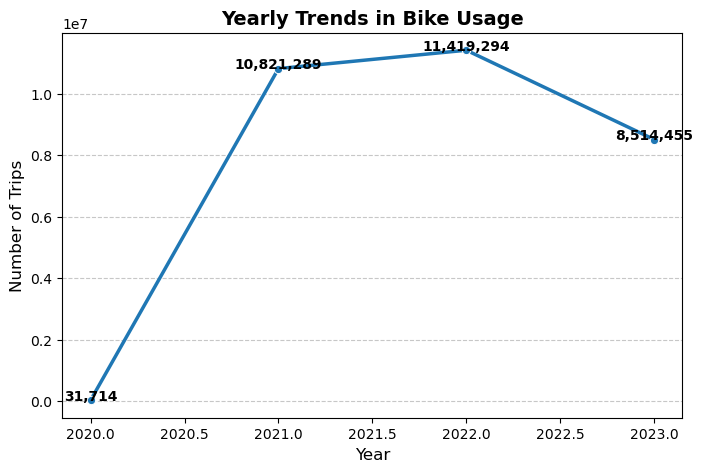

In [29]:
# Group by year and count trips
yearly_trips = df.groupby("Year")["Rental Id"].count()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=yearly_trips.index, y=yearly_trips.values, marker='o', color='#1f77b4', linewidth=2.5)

# Add text labels
for year, count in zip(yearly_trips.index, yearly_trips.values):
    plt.text(year, count, f"{count:,}", ha='center', fontsize=10, fontweight='bold')

# Customize
plt.title("Yearly Trends in Bike Usage", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


## 6.7_Bike_Model_Performance_Analysis-Exploratory_Data_Analysis

#### 📌 Use Case:
Understanding which bike model performs best in terms of trip duration and frequency to optimize bike allocation, identify maintenance needs, and improve user experience.

---

#### 📊 **Total Trips per Bike Model**
- **Use Case:** Identifies the most frequently used bike model, helping in fleet management and maintenance planning.
- **Observation:** UNKNOWN bikes dominate usage, possibly due to missing data on bike models. Classic bikes are still widely used, while PBSC_EBIKE might need more promotion or better accessibility.
---

#### ⏳ **Average Trip Duration per Bike Model**
- **Use Case:** Evaluates user satisfaction and efficiency of bike models based on trip duration.
- **Observation:** "Classic" bikes are used for longer trips, which could mean they are preferred for leisure or longer commutes. "PBSC_EBIKE" trips might be shorter because they assist with pedaling, making trips faster.

---

#### ⏱ **Median Trip Duration per Bike Model**
- **Use Case:** Prevents skewed insights from extreme trip durations, ensuring a fair performance comparison.
- **Observation:** Since median duration is less affected by outliers, this suggests PBSC_EBIKE and UNKNOWN models are used for more consistent trip lengths, while CLASSIC bikes may have more variation in trip duration.

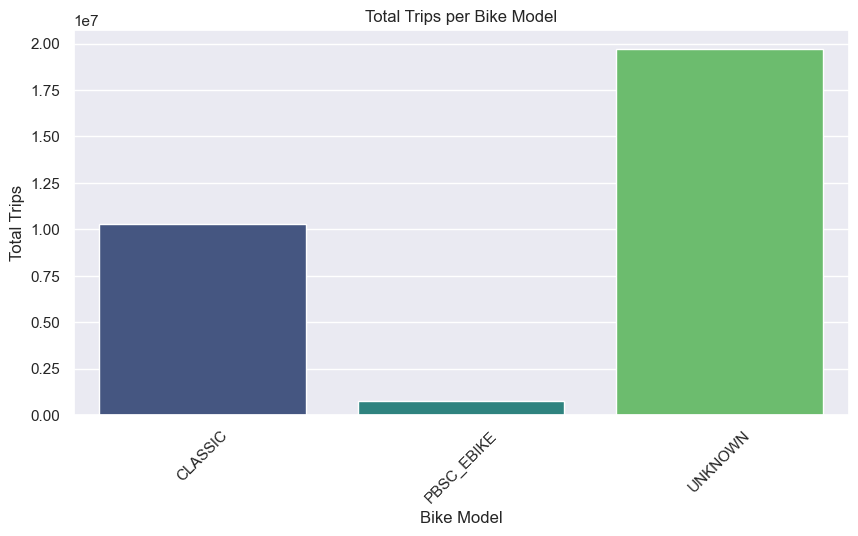

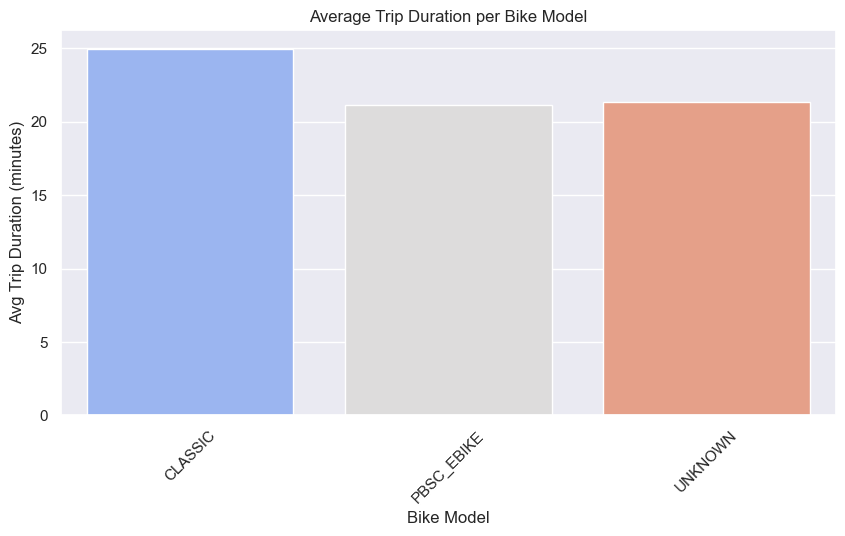

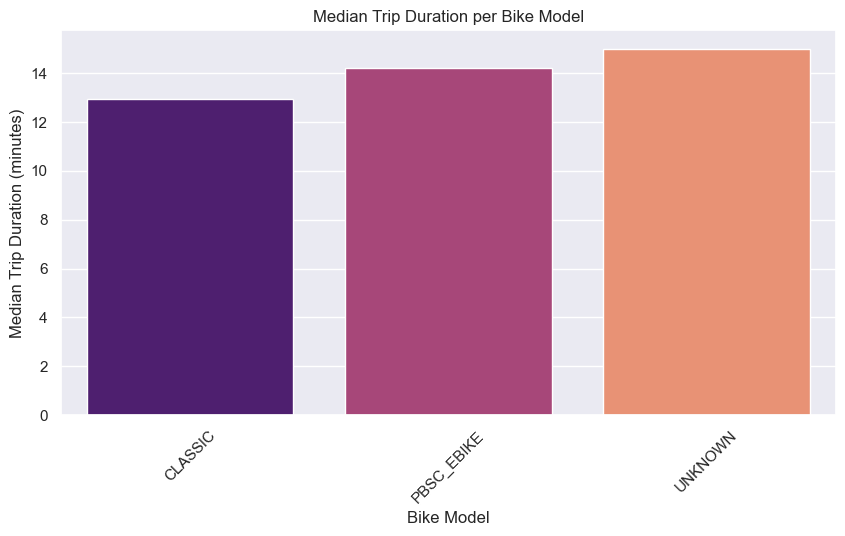

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (Assuming df is the dataset)
df["Trip Duration (minutes)"] = df["Total_Duration_s"] / 60

# Group data by Bike Model
df_bike_model = df.groupby("Bike model").agg(
    total_trips=("Bike Id", "count"),
    avg_trip_duration=("Trip Duration (minutes)", "mean"),
    median_trip_duration=("Trip Duration (minutes)", "median"),
).reset_index()

# Set style
sns.set(style="darkgrid")

## **1. Total Trips per Bike Model**
plt.figure(figsize=(10, 5))
sns.barplot(data=df_bike_model, x="Bike model", y="total_trips", palette="viridis")
plt.title("Total Trips per Bike Model")
plt.xlabel("Bike Model")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)
plt.show()

## **2. Average Trip Duration per Bike Model**
plt.figure(figsize=(10, 5))
sns.barplot(data=df_bike_model, x="Bike model", y="avg_trip_duration", palette="coolwarm")
plt.title("Average Trip Duration per Bike Model")
plt.xlabel("Bike Model")
plt.ylabel("Avg Trip Duration (minutes)")
plt.xticks(rotation=45)
plt.show()

## **3. Median Trip Duration per Bike Model**
plt.figure(figsize=(10, 5))
sns.barplot(data=df_bike_model, x="Bike model", y="median_trip_duration", palette="magma")
plt.title("Median Trip Duration per Bike Model")
plt.xlabel("Bike Model")
plt.ylabel("Median Trip Duration (minutes)")
plt.xticks(rotation=45)
plt.show()


## 6.8_Total_Trips_Per_Day-Exploratory_Data_Analysis

X-axis: Date (from 2021 to early 2024).

Y-axis: Number of trips.

**Observations:**

- There is a clear seasonality in the data, with some periodic rises and falls.

- There is a sharp drop in trips in certain places (possibly due to events like holidays, lockdowns, or weather conditions).

- There is a downward trend in the later period (2023 onwards), suggesting a decline in total trips.

C:\Users\prakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


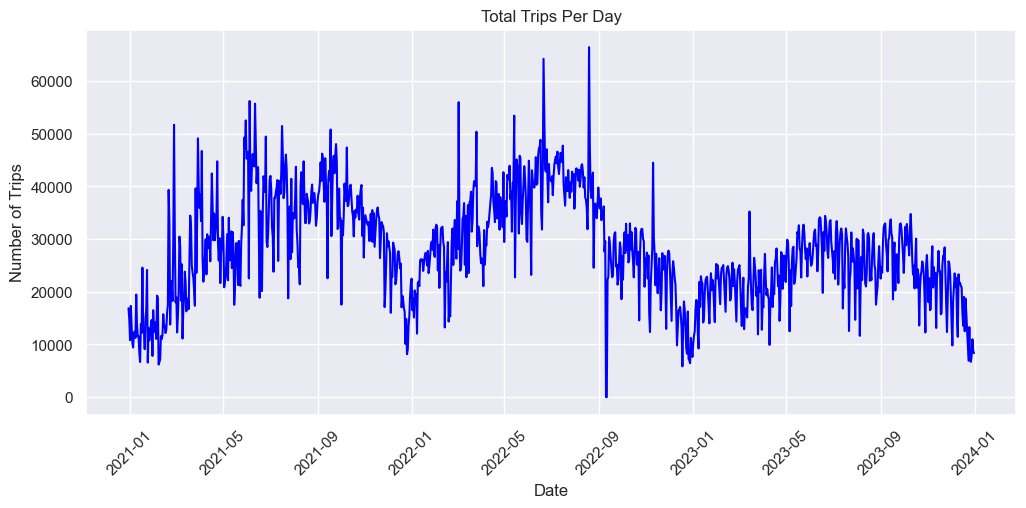

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert trip duration to minutes
df["Trip Duration (minutes)"] = df["Total_Duration_s"] / 60

df['Date'] = pd.to_datetime(df['Start Date']).dt.date
# Aggregate at the date level
df_date = df.groupby(df["Date"]).agg(
    total_trips=("Date", "count"),
    avg_trip_duration=("Trip Duration (minutes)", "mean"),
).reset_index()

# Set plot style
sns.set(style="darkgrid")

# **Total Trips Per Day - Line Plot**
def plot_total_trips(df_date):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df_date, x="Date", y="total_trips", color="blue")
    plt.title("Total Trips Per Day")
    plt.xlabel("Date")
    plt.ylabel("Number of Trips")
    plt.xticks(rotation=45)
    plt.show()
plot_total_trips(df_date)

## 6.9_Average_Trip_Duration_Per_Day-Exploratory_Data_Analysis

X-axis: Date (same range as above).

Y-axis: Average trip duration (in minutes).

**Observations:**

- Most of the time, the average trip duration is relatively stable.

- There are extreme spikes in trip duration at certain points—this could be due to outliers, anomalies, or specific events (such as system errors, weather disruptions, or special occasions).

- The spikes seem to be irregular but happen every few months.

C:\Users\prakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


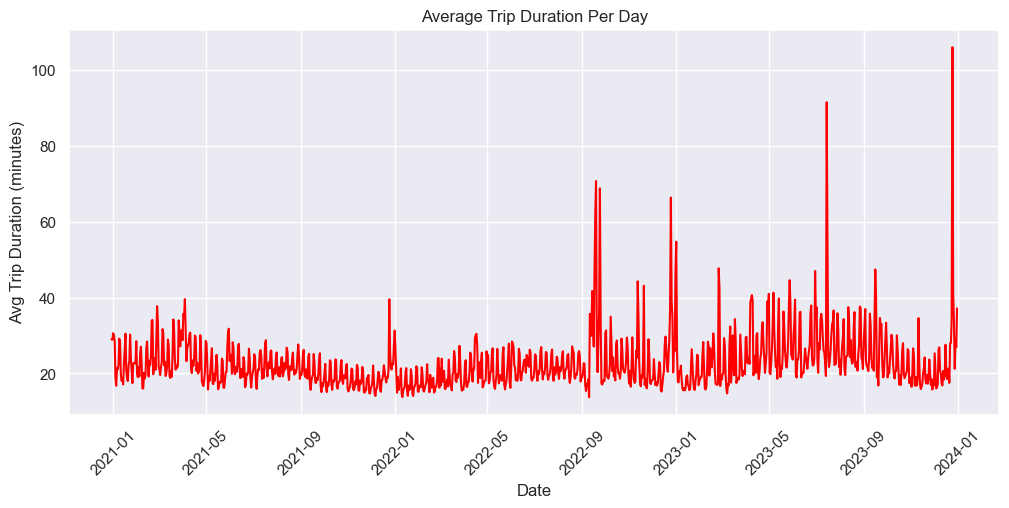

In [29]:
# **Average Trip Duration Per Day - Line Plot**
def plot_avg_trip_duration(df_date):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df_date, x="Date", y="avg_trip_duration", color="red")
    plt.title("Average Trip Duration Per Day")
    plt.xlabel("Date")
    plt.ylabel("Avg Trip Duration (minutes)")
    plt.xticks(rotation=45)
    plt.show()

plot_avg_trip_duration(df_date)

## 6.10_Distribution_of_Trip_Duration_After_Outlier_Removal-Exploratory_Data_Analysis

X-axis: Trip duration (in minutes).

Y-axis: Count (number of trips).

As most trip durations are very small. There might be a large number of extreme outliers (e.g., durations in thousands or tens of thousands of minutes, which is unrealistic). This suggests the need for data cleaning, such as filtering out extremely high trip durations.

**Use Case**

To analyze the distribution of trip durations after filtering out extreme short and long outliers. This helps in understanding the typical trip duration patterns and improving service efficiency.

**Observation**

- The majority of trips fall within the 0-40 minute range, with the peak occurring between 5-15 minutes.

- The distribution shows a right-skewed pattern, indicating that shorter trips are more common than longer ones.

- Removing outliers has provided a clearer view of trip duration trends, which was would have been distorted due to extreme values.

- There is a gradual decline in the number of trips as duration increases, suggesting that most users prefer shorter trips.

C:\Users\prakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


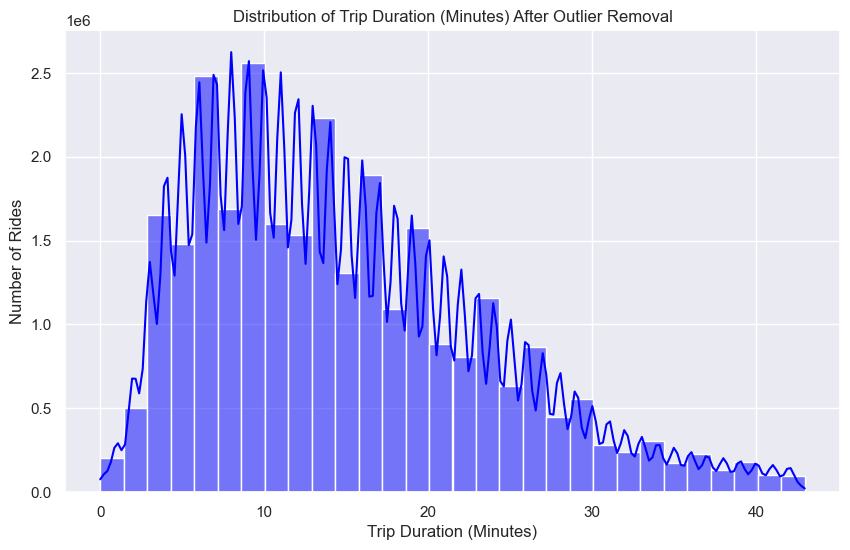

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe with column "Total_Duration_s"
df["Trip_Duration_Minutes"] = df["Total_Duration_s"] / 60

# Calculate Q1, Q3, and IQR
Q1 = df["Trip_Duration_Minutes"].quantile(0.25)
Q3 = df["Trip_Duration_Minutes"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df_filtered = df[(df["Trip_Duration_Minutes"] >= lower_bound) & (df["Trip_Duration_Minutes"] <= upper_bound)]

# Plot distribution of filtered data
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["Trip_Duration_Minutes"], bins=30, kde=True, color="blue")
plt.title("Distribution of Trip Duration (Minutes) After Outlier Removal")
plt.xlabel("Trip Duration (Minutes)")
plt.ylabel("Number of Rides")
plt.show()

## 6.11_Outlier_Detection_in_Bike_Demand_Data-Exploratory_Data_Analysis

Outliers detected: 2
          Date  Demand
619 2022-09-10       4
620 2022-09-11       7


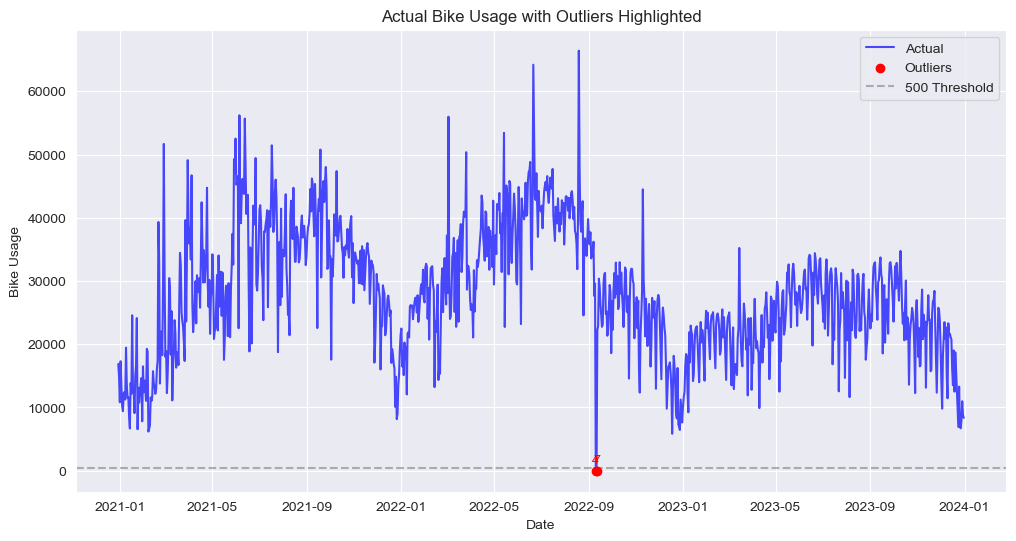

In [193]:
# Aggregate bike demand per day
df['Date'] = pd.to_datetime(df['Date'])
daily_demand = df.groupby('Date').size().reset_index(name='Demand')

import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(daily_demand["Date"], daily_demand["Demand"], label="Actual", color="blue", alpha=0.7)

# Highlight the filtered outliers (actual values < 500)
outliers = daily_demand[daily_demand['Demand'] < 500]
print(f"Outliers detected: {len(outliers)}")
print(outliers)

plt.scatter(outliers["Date"], outliers["Demand"], color="red", label="Outliers", zorder=3)

# Annotate outlier points with their values
for _, row in outliers.iterrows():
    plt.annotate(f"{row['Demand']}", (row["Date"], row["Demand"]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='red')

# Formatting
plt.axhline(y=500, color="gray", linestyle="--", alpha=0.6, label="500 Threshold")
plt.xlabel("Date")
plt.ylabel("Bike Usage")
plt.title("Actual Bike Usage with Outliers Highlighted")
plt.legend()
plt.grid(True)
plt.show()


- **Most data points** are within expected demand levels, with a strong seasonal pattern.
- **Only a few outliers** were detected, indicating a relatively clean dataset.
- **Outliers (red points) appear near the lower threshold (500 trips)**, suggesting occasional extreme drops in demand.
- **The demand exhibits cyclical trends**, with peaks in warmer months and dips in colder months.


In [195]:
#!pip install xgboost
#!pip install prophet
#!pip installtensorflow
#!pip install torch torchvision torchaudio

## Task 3. Select a use case and prototype a simple model that demonstrates the application of data science to this business

# 7_Bike Demand Forecasting


Bike Demand Forecasting helps predict peak demand times and station congestion, ensuring better resource allocation and bike availability.



#### **Forecasting Metrics which are utilized in further analysis : -**

***MAE (Mean Absolute Error)*** - MAE measures the average absolute differences between predicted and actual values. Lower MAE indicates better model performance.

***RMSE (Root Mean Squared Error)*** - RMSE penalizes larger errors more than MAE, making it sensitive to extreme values. A lower RMSE suggests a model with more accurate predictions.

***MAPE (Mean Absolute Percentage Error)*** - MAPE expresses error as a percentage, making it useful for comparing model accuracy across different datasets. A lower MAPE signifies better forecasting accuracy.

***SMAPE (Symmetric Mean Absolute Percentage Error)*** - SMAPE is a variation of MAPE that accounts for both overestimations and underestimations. It is particularly useful for datasets with highly fluctuating values.


## Comparing XGBoost, LSTM, Prophet and SARIMA models : -

## 7.1_XGBoost-and-LSTM-models-Bike-Demand-Forecasting

### 7.1.1_XGBoost

XGBoost (Extreme Gradient Boosting) is an ensemble learning method known for its high predictive accuracy. It is widely applied in structured data problems such as sales forecasting, fraud detection, and financial modeling. XGBoost efficiently handles complex patterns and interactions in the data, but it may require extensive hyperparameter tuning for optimal performance.

#### Why Use XGBoost for Forecasting?
XGBoost is a powerful gradient boosting algorithm known for its high accuracy and efficiency in structured data prediction. Unlike deep learning models, XGBoost is robust in handling missing values and capturing important feature interactions. It is particularly effective because:

⚡ It provides fast and scalable training on large datasets  
📊 It captures non-linear relationships through boosted decision trees  
📉 It handles outliers and irregular demand variations efficiently  

For bike demand forecasting, XGBoost is useful for modeling demand based on structured features like date and historical trends.

### **7.1.2_LSTM-Long-Short-Term-Memory-Networks**

LSTM is a type of recurrent neural network (RNN) specialized for sequential data and long-term dependencies. It is commonly used in speech recognition, natural language processing, and advanced time series forecasting. LSTMs excel at capturing nonlinear patterns and seasonality, making them the most suitable for complex demand forecasting tasks.

#### Why Use LSTM for Forecasting?
LSTM (Long Short-Term Memory) networks are a type of recurrent neural network (RNN) designed to capture temporal dependencies in sequential data. They are highly effective for time-series forecasting due to their ability to retain past information over long sequences. LSTMs excel in:

🧠 Remembering long-term dependencies in demand patterns  
📈 Learning complex non-linear relationships in data  
🔄 Handling seasonality and trends in historical records  

For bike demand forecasting, LSTMs are useful because they can learn from past ridership fluctuations and predict future demand more accurately than traditional models.

---

#### Why Use a Train-Test Split for LSTM and XGBoost?
Unlike Prophet, LSTM and XGBoost require explicit train-test splits because they learn patterns from past data and generalize them to unseen data.

✅ LSTM needs a train-test split to avoid overfitting and ensure that it generalizes well to future predictions.  
✅ XGBoost uses historical data to train decision trees and requires separate validation data to fine-tune hyperparameters.  

This approach ensures both models are evaluated properly and prevent them from just memorizing past patterns without generalization.


Outliers detected and removed: 2
          Date  Demand
619 2022-09-10       4
620 2022-09-11       7
Epoch 10/50, Loss: 0.010694
Epoch 20/50, Loss: 0.010560
Epoch 30/50, Loss: 0.009009
Epoch 40/50, Loss: 0.009167
Epoch 50/50, Loss: 0.008609
XGBoost - MAE: 4231.02 trips, RMSE: 5612.08 trips, MAPE: 21.06%, SMAPE: 17.70%


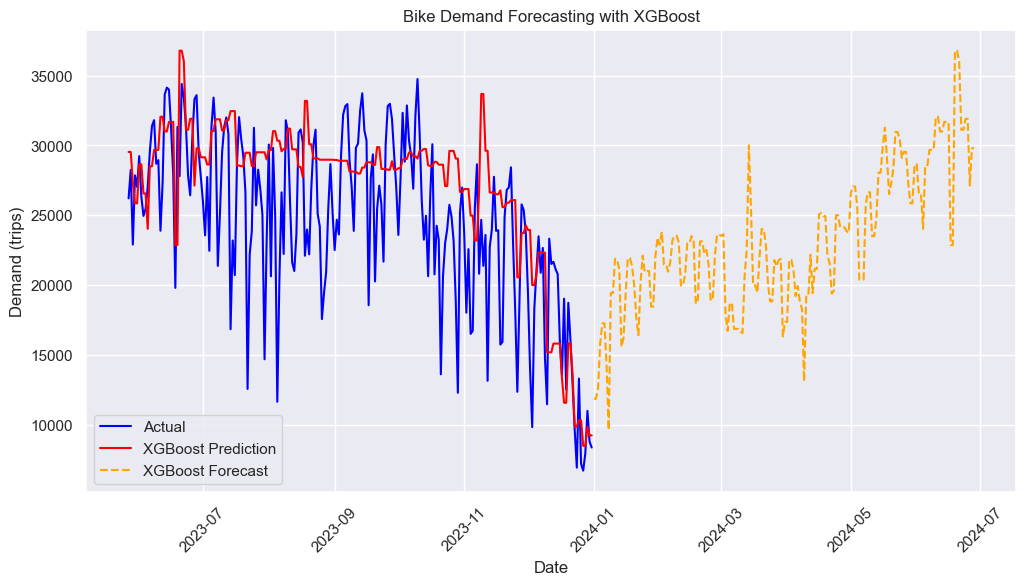

LSTM - MAE: 3084.13 trips, RMSE: 4080.19 trips, MAPE: 16.19%, SMAPE: 14.15%


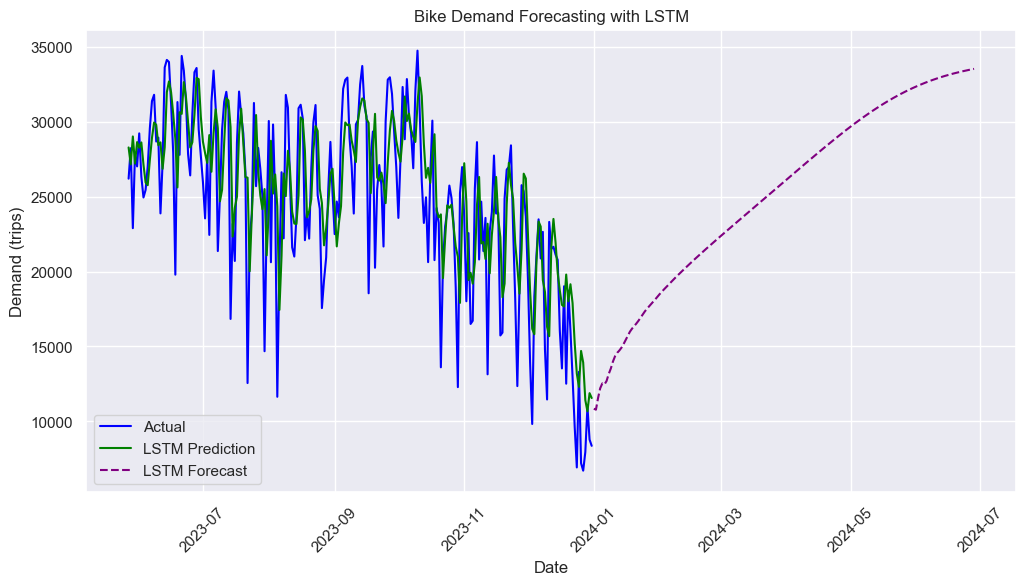

In [34]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate bike demand per day
daily_demand = df.groupby('Date').size().reset_index(name='Demand')

# Detect and remove outliers (Demand < 500)
outliers = daily_demand[daily_demand['Demand'] < 500]
print(f"Outliers detected and removed: {len(outliers)}")
print(outliers)

daily_demand = daily_demand[daily_demand['Demand'] >= 500]

# Train-test split
split_idx = int(0.8 * len(daily_demand))
train, test = daily_demand[:split_idx], daily_demand[split_idx:]

# Prepare features for XGBoost
train['Day'] = train['Date'].dt.dayofyear
train['Year'] = train['Date'].dt.year
test['Day'] = test['Date'].dt.dayofyear
test['Year'] = test['Date'].dt.year

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(train[['Day', 'Year']], train['Demand'])
xgb_pred = xgb_model.predict(test[['Day', 'Year']])

# Normalize data for LSTM
scaler = MinMaxScaler()
daily_demand["Scaled_Demand"] = scaler.fit_transform(daily_demand[["Demand"]])

# Prepare LSTM sequences (Using past 7 days)
sequence_length = 7
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

# Split train-test for LSTM
scaled_train = daily_demand["Scaled_Demand"].values[:split_idx]
scaled_test = daily_demand["Scaled_Demand"].values[split_idx-sequence_length:]

X_train, y_train = create_sequences(scaled_train, sequence_length)
X_test, y_test = create_sequences(scaled_test, sequence_length)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).unsqueeze(-1)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(-1)
X_test_tensor = torch.FloatTensor(X_test).unsqueeze(-1)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(-1)

# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=16, shuffle=True)

# Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1])

# Train LSTM Model
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.6f}")

# Evaluate LSTM Model
model.eval()
lstm_predictions = model(X_test_tensor).detach().numpy()
y_test_real = scaler.inverse_transform(y_test_tensor.numpy())
lstm_predictions_real = scaler.inverse_transform(lstm_predictions)

# Forecasting 6 months ahead
future_days = 180
last_date = daily_demand['Date'].iloc[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]

# XGBoost Future Predictions
future_xgb = pd.DataFrame({'Day': [(last_date + timedelta(days=i)).timetuple().tm_yday for i in range(1, future_days + 1)],
                           'Year': [(last_date + timedelta(days=i)).year for i in range(1, future_days + 1)]})
xgb_future_pred = xgb_model.predict(future_xgb)

# LSTM Future Predictions
def forecast_lstm(model, past_data, future_days, sequence_length, scaler):
    model.eval()
    future_predictions = []
    current_sequence = past_data[-sequence_length:].tolist()
    
    for _ in range(future_days):
        seq_tensor = torch.FloatTensor(current_sequence).unsqueeze(0).unsqueeze(-1)
        with torch.no_grad():
            next_pred = model(seq_tensor).item()
        
        future_predictions.append(next_pred)
        current_sequence.append(next_pred)
        current_sequence.pop(0)  # Maintain sequence length
    
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

lstm_future_pred = forecast_lstm(model, daily_demand['Scaled_Demand'].values, future_days, sequence_length, scaler)

# Evaluate Models
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    smape_value = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))
    mape_value = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"{model_name} - MAE: {mae:.2f} trips, RMSE: {rmse:.2f} trips, MAPE: {mape_value:.2f}%, SMAPE: {smape_value:.2f}%")


# Plot XGBoost Forecast using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=test['Date'], y=test['Demand'], label="Actual", color='blue')
sns.lineplot(x=test['Date'], y=xgb_pred, label="XGBoost Prediction", color='red')
sns.lineplot(x=future_dates, y=xgb_future_pred, label="XGBoost Forecast", color='orange', linestyle='dashed')
plt.title("Bike Demand Forecasting with XGBoost")
plt.xlabel("Date")
plt.ylabel("Demand (trips)")
plt.xticks(rotation=45)
plt.legend()

evaluate(test['Demand'].values, xgb_pred, "XGBoost")

plt.show()


# Plot LSTM Forecast using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=test['Date'], y=test['Demand'], label="Actual", color='blue')
sns.lineplot(x=test['Date'][:len(y_test)], y=lstm_predictions_real.flatten(), label="LSTM Prediction", color='green')
sns.lineplot(x=future_dates, y=lstm_future_pred, label="LSTM Forecast", color='purple', linestyle='dashed')
plt.title("Bike Demand Forecasting with LSTM")
plt.xlabel("Date")
plt.ylabel("Demand (trips)")
plt.xticks(rotation=45)
plt.legend()

evaluate(y_test_real, lstm_predictions_real, "LSTM")

plt.show()

### Forecast Analysis Summary

- **LSTM is better for long-term forecasting** as it provides a smoother trend, learns seasonality well, and has lower error metrics (MAE: 3158, RMSE: 4239, MAPE: 16.58%). It is more stable for predicting demand over six months.

- **XGBoost is better for short-term forecasting** as it captures fluctuations effectively but has higher errors (MAE: 4231, RMSE: 5612, MAPE: 21.06%) and produces a more irregular long-term forecast. Suitable for short-term demand variations.


Hence, in conclusion **LSTM** has demonstrated the ***best performance*** in predicting bike demand. It has the lowest error metrics, capturing seasonality and trends more effectively than **XGBoost**. Given its superior accuracy, LSTM shall be used for future demand forecasting.

## 7.2_Prophet-model-Bike-Demand-Forecasting

Prophet, developed by Facebook, is a robust model designed for business forecasting applications, especially for handling missing data and irregular trends. It is commonly used in marketing analytics, web traffic prediction, and financial modeling. Prophet works well with seasonality but may not always capture rapid fluctuations in demand accurately.

#### **Why Use Prophet for Forecasting?**
Prophet was chosen because it excels at capturing **seasonal patterns and long-term trends** in time-series data. Unlike traditional models, which struggle with complex fluctuations, Prophet can automatically detect:

- 🗓 **Weekly, monthly, and yearly cycles**
- 📈 **Long-term trend variations**
- 📉 **Outlier handling and missing data adaptability**

This makes it highly effective for **bike demand forecasting**, where ridership varies due to commuting patterns.

---

#### **Why No Train-Test Split?**
Unlike traditional machine learning models, **Prophet does not require an explicit train-test split** because it treats the entire dataset as historical data to learn from.The model fits all available data and forecasts future points based on learned patterns.

✅ Instead of fitting on a portion and testing on the rest, Prophet makes future projections based on past trends.  
✅ This makes Prophet naturally suited for time series forecasting without the need for a separate validation set.

---

**Conclusion:** Prophet effectively captures demand cycles, making it a strong choice for forecasting scenarios where seasonality and trends dominate.

Removed 2 outlier records with trips < 500.


00:19:50 - cmdstanpy - INFO - Chain [1] start processing
00:19:50 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 5603.70
Prophet MAE: 4177.56
Prophet MAPE: 17.98%
Prophet SMAPE: 16.48%


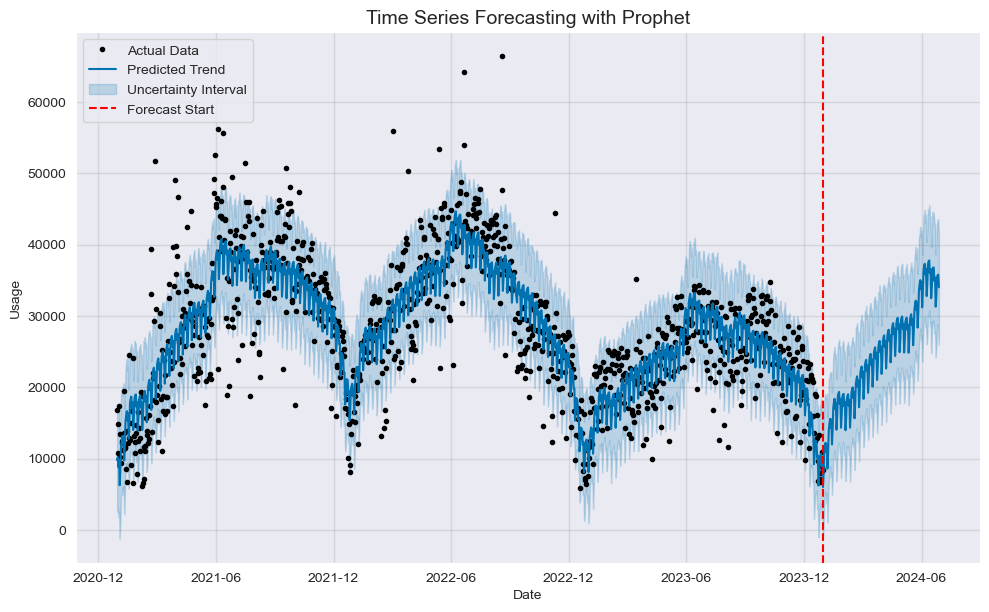

In [194]:
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Convert date column to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Aggregate to daily level
df2 = pd.DataFrame()
df2['ds'] = df['Start Date'].dt.date  # Convert datetime to date

df2 = df2.groupby('ds').size().reset_index(name='y')  # Count trips per day

# Remove records where trips are < 500 (outliers)
outlier_count = df2[df2['y'] < 500].shape[0]  # Count number of removed outliers
df2 = df2[df2['y'] >= 500]  # Remove outliers

print(f"Removed {outlier_count} outlier records with trips < 500.")

# Train Prophet model
model = Prophet()
model.fit(df2)

# Make future predictions
future = model.make_future_dataframe(periods=180, freq='D')  # Predict next 180 days
forecast = model.predict(future)

# Extract actual and predicted values for evaluation
y_actual = df2['y'].values
y_pred = forecast.iloc[:len(y_actual)]['yhat'].values  # Align with actual data

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mae = mean_absolute_error(y_actual, y_pred)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
smape = np.mean(2 * np.abs(y_actual - y_pred) / (np.abs(y_actual) + np.abs(y_pred))) * 100

# Print metrics
print(f"Prophet RMSE: {rmse:.2f}")
print(f"Prophet MAE: {mae:.2f}")
print(f"Prophet MAPE: {mape:.2f}%")
print(f"Prophet SMAPE: {smape:.2f}%")

# Plot results
fig = model.plot(forecast)

# Mark last actual data point for separation
last_actual_date = df2['ds'].max()
plt.axvline(x=last_actual_date, color='red', linestyle='--', label='Forecast Start')

# Add title and labels
plt.title("Time Series Forecasting with Prophet", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Usage")

# Move legend to top-left corner
plt.legend(["Actual Data", "Predicted Trend", "Uncertainty Interval", "Forecast Start"], loc='upper left')

plt.show()

#### **Pattern Detection and Prophet Model Strengths**
One of Prophet’s major advantages is its ability to **smoothly model trends while handling irregularities**. Key observations from the forecast:

🔹 The **black dots** (actual data) exhibit clear seasonal demand patterns.  
🔹 The **blue line** (Predicted Trend) closely follows fluctuations, capturing annual demand peaks and dips.  
🔹 The **blue shaded region** represents **uncertainty intervals**—wider regions indicate more variability in predictions.  
🔹 The **red dashed line** marks the start of the forecast, meaning everything to the right is Prophet’s prediction for the next 6 months.

💡 *Prophet's forecast suggests a steady increase in bike demand post-winter, with peaks expected in summer, aligning with past trends.*

## 7.3_SARIMA-model-Bike-Demand-Forecasting

**SARIMA(Seasonal AutoRegressive Integrated Moving Average)** is widely used for time series forecasting where seasonality is a key component. It is effective for datasets with strong periodic patterns, such as retail sales, energy consumption, and stock market trends. However, SARIMA struggles when data exhibits nonlinear trends, making it less effective for highly dynamic environments like bike demand prediction.


**SARIMA (No Train-Test Split Needed)**

Why? SARIMA is a statistical model that uses past values and residuals to make forecasts. It directly learns from the full dataset without needing a separate test set.

How? It makes recursive predictions based on historical trends and seasonal components.

SARIMA Metrics:
MAE: 11182.37 trips
RMSE: 13024.86 trips
MAPE: 56.46%
SMAPE: 86.28%


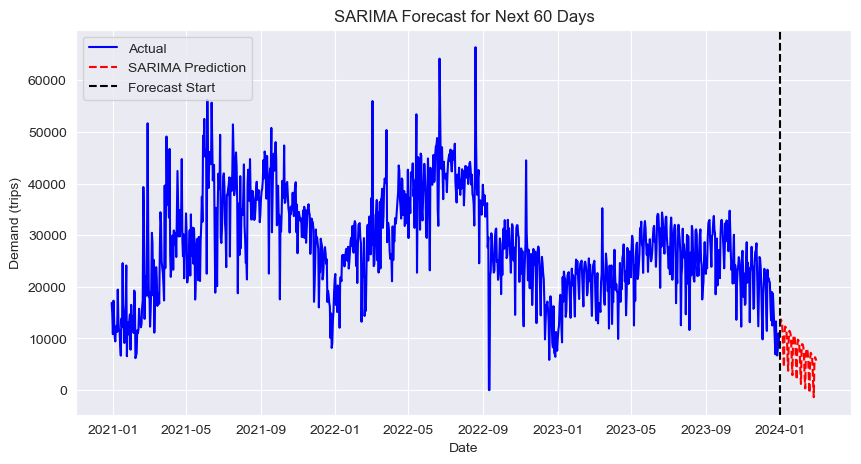

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert 'Date' column to datetime and aggregate demand
df['Date'] = pd.to_datetime(df['Date'])
daily_demand = df.groupby('Date').size().reset_index(name='Demand')

# Train SARIMA model on the entire dataset
sarima_model = SARIMAX(daily_demand['Demand'], order=(1,1,1), seasonal_order=(1,1,1,7)).fit()

# Forecast for the next 60 days
future_dates = pd.date_range(start=daily_demand['Date'].max() + pd.Timedelta(days=1), periods=60, freq='D')
sarima_forecast = sarima_model.forecast(steps=60)

# Get actual values for comparison (last 60 days of known data)
actual_values = daily_demand['Demand'].iloc[-60:].values

# Compute metrics
mae = mean_absolute_error(actual_values, sarima_forecast[:60])
rmse = np.sqrt(mean_squared_error(actual_values, sarima_forecast[:60]))
mape = np.mean(np.abs((actual_values - sarima_forecast[:60]) / actual_values)) * 100
smape = 100 * np.mean(2 * np.abs(actual_values - sarima_forecast[:60]) / (np.abs(actual_values) + np.abs(sarima_forecast[:60])))

# Print evaluation metrics
print(f"SARIMA Metrics:\nMAE: {mae:.2f} trips\nRMSE: {rmse:.2f} trips\nMAPE: {mape:.2f}%\nSMAPE: {smape:.2f}%")

# Plot results
plt.figure(figsize=(10,5))
plt.plot(daily_demand['Date'], daily_demand['Demand'], label="Actual", color='blue')
plt.plot(future_dates, sarima_forecast, label="SARIMA Prediction", color='red', linestyle='dashed')
plt.axvline(x=daily_demand['Date'].max(), color='black', linestyle='--', label='Forecast Start')
plt.title("SARIMA Forecast for Next 60 Days")
plt.xlabel("Date")
plt.ylabel("Demand (trips)")
plt.legend()
plt.show()

The **forecast (in red)** shows the projected demand for the next 60 days based on the SARIMA model. The black dashed line represents the point where the forecast starts. The model has been trained on all available data without a train-test split.

🚫 The SARIMA model is **not suitable for our data** due to its **very high MAPE (56.46%) and SMAPE (86.28%)**, indicating poor predictive accuracy.  
1. **High Error Rate**: The MAPE value suggests that the predictions deviate significantly from actual values, making it unreliable for forecasting.  
2. **Seasonality & Trend Limitations**: SARIMA works best with strong seasonal patterns, but our dataset likely has complex trends and external factors affecting demand.  
3. **Volatility Handling Issues**: The dataset exhibits significant fluctuations in bike demand, which SARIMA struggles to model effectively.  

## 8_Key-Observations

| Rank | Model   | MAE (Lower is better) | RMSE (Lower is better) | MAPE (%) | SMAPE (%) | Key Strength |
|------|--------|----------------------|----------------------|---------|---------|--------------|
| 1️⃣  | **LSTM**  | **3084.13** | **4080.19** | **16.19** | **14.15** | Best for capturing short-term fluctuations, lowest error |
| 2️⃣  | **Prophet** | 4177.56 | 5603.70 | 17.98 | 16.48 | Captures seasonality well, reasonable long-term forecasts |
| 3️⃣  | **XGBoost** | 4231.02 | 5612.08 | 21.06 | 17.70 | Good for short-term prediction, but volatile |
| 4️⃣  | **SARIMA**  | 11182.37 | 13024.86 | 56.46 | 86.28 | Poor long-term forecasting, struggles with trend |


- **LSTM - Best overall model with the lowest MAE, RMSE, MAPE, and SMAPE.**

- **Prophet - Second-best, as it captures seasonality well and has lower errors than XGBoost.**

- **XGBoost - Performs slightly worse than Prophet due to higher MAPE and volatility.**

- **SARIMA - Worst performer, with significantly high errors and poor forecasting ability.**

---

### **Conclusion**
- **The dataset has few outliers**, meaning it is generally reliable for modeling.
- **LSTM is the most promising model** for accurate forecasting.

## 9_Appendix

***Checking the LSTM Model Residual Plot and Distribution of Residuals*** 

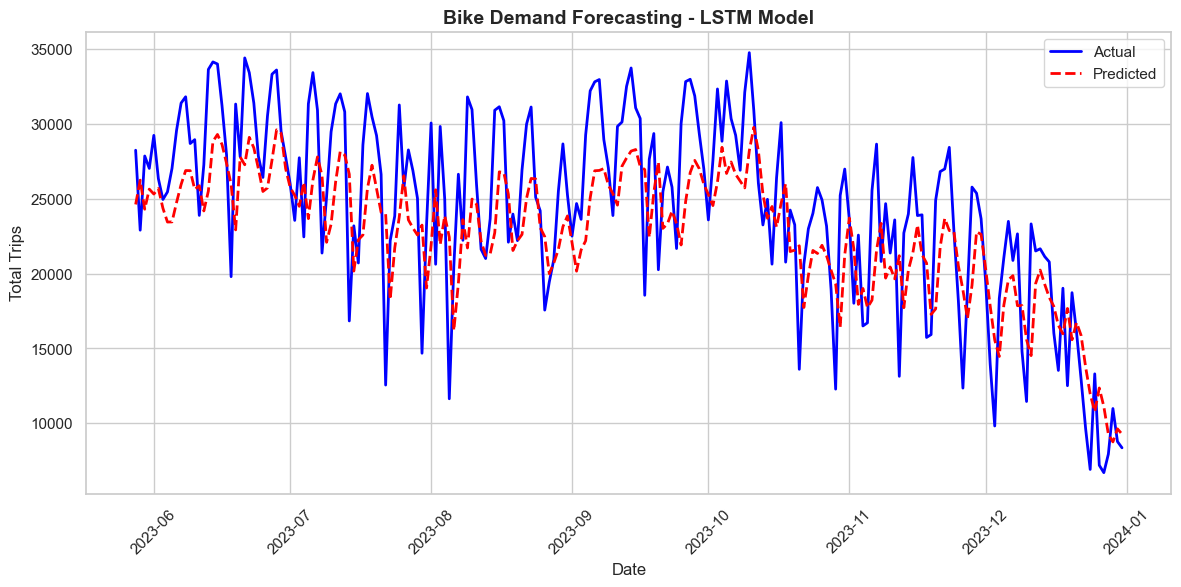

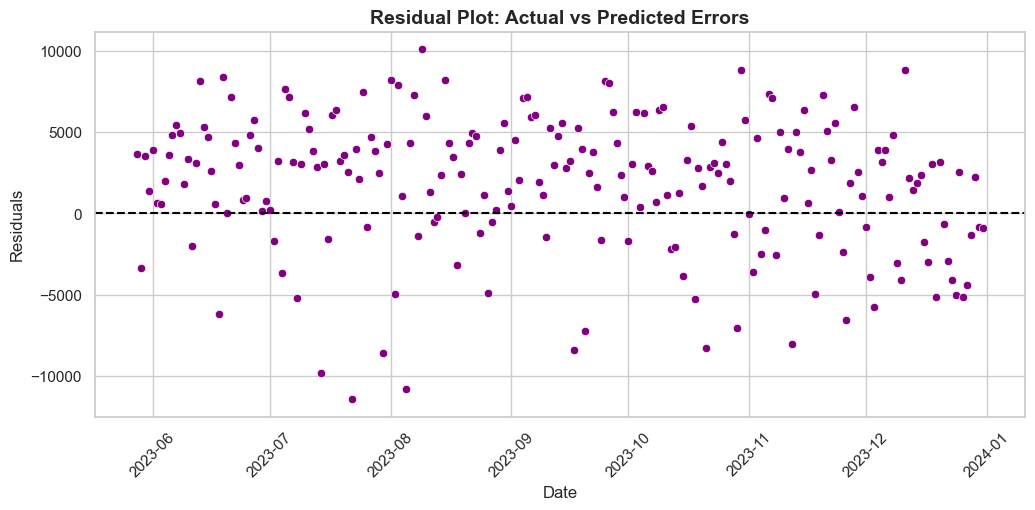

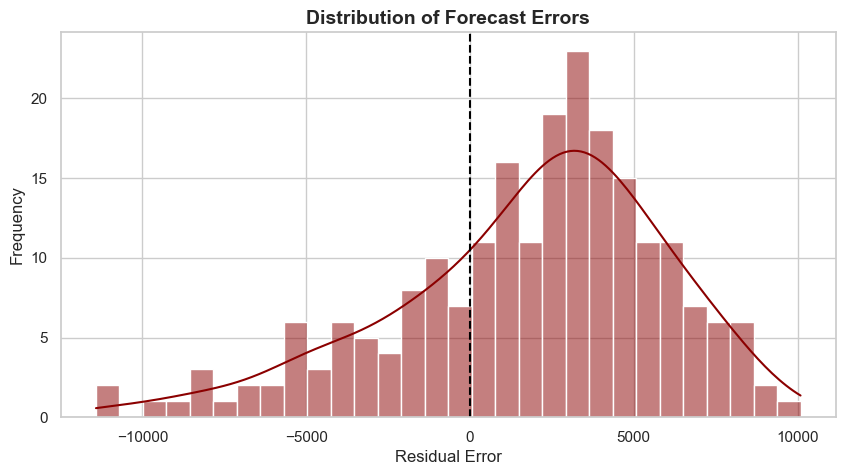

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## --- Visualization 1: Improved Line Plot ---
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")

# Plot actual vs predicted
sns.lineplot(x=df_viz["Date"], y=df_viz["Actual"], label="Actual", color="blue", linewidth=2)
sns.lineplot(x=df_viz["Date"], y=df_viz["Predicted"], label="Predicted", color="red", linestyle="dashed", linewidth=2)

# Labels and Titles
plt.title("Bike Demand Forecasting - LSTM Model", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Trips", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()

## --- Visualization 2: Residual Plot ---
df_viz["Residuals"] = df_viz["Actual"] - df_viz["Predicted"]

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_viz["Date"], y=df_viz["Residuals"], color="purple")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Residual Plot: Actual vs Predicted Errors", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.xticks(rotation=45)
plt.show()

## --- Visualization 3: Distribution of Residuals ---
plt.figure(figsize=(10, 5))
sns.histplot(df_viz["Residuals"], bins=30, kde=True, color="darkred")
plt.axvline(0, color="black", linestyle="dashed")
plt.title("Distribution of Forecast Errors", fontsize=14, fontweight="bold")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.show()
